<div>
  <img src="TransparentLogo+Text.png" align="left" style="display: block; width: 100px;"/>
  <div style="clear:both;"></div> <!-- Clear the float -->
</div>
<div style="padding-top: 5em;"> <!-- Add space above the title -->
  <h1>Your Portfolio</h1>
  <p>By The Camillus Group investment advisor service.</p>
</div>



# Capstone Project for Analyze Financial Data with Python Skill Path

## Instruction Set

A young client wants to invest a large amount of their savings in a portfolio of stocks. As her financial advisor, you will create a presentation th
at showcases a portfolio of stocks that you recommend your client invest in, and provide the weights at which they should invest in each stock depending on their risk preference.

The purpose of this capstone is to: (1) practice accessing and downloading financial data, (2) calculating financial statistics to understand the individual performance of an asset and how groups of assets are related, and (3) how to allocate investments across assets for optimal performance.

### (1) Import/Download the Data

You can access financial data using one of the APIs accessed through the pandas-datareader package or from websites such as Yahoo Finance. Use at least four (4) stocks to include in your analysis. Load the data into a pandas DataFrame so you can easily view and manipulate the data.

### (2) Calculate Financial Statistics

Calculate some of the financial statistics you have learned about to gain insights into the stocks and how they relate to each other. What are the returns of the stocks over different time periods? How risky are each of the stocks when compared to each other? Do the returns of the stocks correlate with each other, or are they diversified?

### (3) Optimized Portfolio

Perform a mean-variance portfolio optimization that shows the efficient frontier for the group of stocks you have selected. If the investor is less risky, how should she allocate her funds across the portfolio? If she is more risky, how should she allocate her funds? Indicate multiple investment options at different risk levels and specify the returns.

### (4) Create Your Presentation

We want to see:

* information about the stocks you utilized (industry, sector, background, news)
* the key financial statistics about the stocks and how you interpret them
* a few different portfolio options with the stock weights and why the investor would select that portfolio
* an overall conclusion to the client about your recommendations

### (5) Share your Presentation

Save presentation as a Google Slide or some other presentation format and post it on the Codecademy forum. 

# Investment Criteria Recommended by TCG

## TCG's 'Your Portfolio' Method

First, The Camillus Group (TCG) meets with clients to discuss their requirements, objectives, and preferences.  This informs us about the criteria that should be applied to developing investment portfolio recommendations.  After this process, TCG determined the following factors and criteria for investing.

This client case:

1) Client's assets are substantial. Her investment portfolio will be large and have room for substantial diversification.
2) The client is young. We recommend seeking higher returns with significant portion of portolio.
3) Client rents. We recommend she purchase a home. No need for allocation to real estate in investment portfolio.
4) We generally recommend some allocation to bonds, but given the youth of the client, we consider her portfolio without bonds.
5) Client wants options for portolios based on risk.

TCG applies the following criteria to most client porfolios:
* Include a very diversified index fund to anchor the porfolio
* For individual stocks, seek sector leaders in moderate to high growth industries
* Avoid high concentration of stocks in one industry sector
* Evaluate stocks based on PEG ratio and other fundamental valuation factors
* Maximum of 10 individual company stocks. Keeps research manageable for client.
* Consider stocks that have been "unfairly punished" recently
* Find at least one uncorrelated stock or index fund to dampen market swings.
* Consider including non-US stock or index fund

TCG also recommends asset allocation between stocks, bonds, and real estate. 
* Asset allocation between stocks, bonds, and real estate. 
* Allocations based on age and risk tolerance.
* Asset allocation is becomes more important with age.


With these criteria in mind, the initial universe of stocks considered for the client's porfolio were:

Apple 'AAPL', Amazon 'AMZN', Boeing 'BA', Chevron 'CVX', Costco 'COST', Eli Lilly 'LLY', Ferrari 'RACE', Google 'GOOG', JP Morgan Chase 'JPM', Microsft 'MSFT', Nvidia 'NVDA', T-Mobile US 'TMUS', Tesla 'TSLA', Verizon 'VZ', and Walmart 'WMT'

For diversification, TCG included Vanguard S&P 500 Index ETF 'VOO'.  For international exposure,  Vanguard FTSE All World Except US ETF 'VEU' was considered.  For asset allocation to bonds Vanguard Total Bond Market ETF 'BND' was including in the analysis but not for the portolio recommendation.  Vanguard ETF's were selected because they have low fees.

Note that while TCG recommends some allocation to bonds, given the long investment horizon of the client, bonds were not included in her starting portfolio.  A view of the potential utilitization of bonds is provided.


# 1) Import Required Packages from Libraries

### Step 1: Install Required Packages

These packages are not already installed system-wide on my computer. Installation done on my computer to avoid cluttered output here:

* `pip install cvxopt`
* `pip install seaborn`
* `pip install pandas_datareader`

### Step 2:  Import Required Packages - General

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 3: Import Financial Data Packages

Will use APIs to access data from Yahoo Finance and pandas-datareader.  Check to see
if data is available for all ticker symbols.  May combine data from both sources.

In [172]:
import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yfin

### Step 4: Import Visualization Package

Import `matplotlib.pyplot as plt`. 
Add `%matplotlib inline` so that visualization output appears below code that produces them.
Also import `seaborn`, which is a data visualization library based on Matplotlib that creates informative and attractive statistical graphics.

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 5: Import Convex Optimization Package
    
Here import `cvxopt` which is needed for the function `optimal_portfolio` that will produce optimized portfolios required later.

In [174]:
import cvxopt as opt
from cvxopt import blas, solvers

**No errors.**  
Now the environment should have the tools required to perform all the code.

# 2) Define Required Functions

The functions `return_portfolios` and `optimal_porfilios` are defined here. They are required for later steps.

* `return_portolios` generates 5,000 randomly weighted portfolios from the stocks included in a defined coveriance matrix. 
* `optimal_portfolio` returns the portfolio weights that are on the efficient frontier (optimized weights) along with the expected returns and risks of these portfolios. 

The required input parameters and the returns from the functions are easily evident.

The required `cvxopt` packages was imported in previous step. 

I revise these functions later to make them more useful.

In [175]:
# Original portfolio functions from course. I revised both later to get better results.

def return_portfolios(expected_returns, cov_matrix):
    rng = np.random.default_rng()  # Create a new random number generator instance
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df
  
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.to_numpy())

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

# 3) Performing the Analysis and Visualizations

## Import and Download the Data

Instructions for using `yfinance` for Yahoo Finance:

https://github.com/ranaroussi/yfinance#requirements

In [176]:
# Initial list of ticker symbols

stocks_1 = ['WMT', 'COST', 'TSLA', 'RACE', 'AMZN', 'NVDA', 'AAPL', 'MSFT', 'GOOG', 'VZ', 'TMUS', 'BA', 'LLY', 'JPM', 'CVX']
etfs_1 = ['VOO', 'VEU']
bonds_1 = ['BND']
all_ticks = stocks_1 + etfs_1 + bonds_1

#Note that for data pulls, I do not give an end date. This way, it updates with all the data available up to the date the program is run. 

#Setting up data for long list of stocks for analysis
pre_data = yfin.download(all_ticks, start='2013-01-01') #No end date intentional

pre_data_adj_close = pre_data['Adj Close']
print(pre_data_adj_close.head(1))

[*********************100%%**********************]  18 of 18 completed
                 AAPL     AMZN        BA        BND       COST        CVX  \
Date                                                                        
2013-01-02  16.791182  12.8655  64.58387  62.888859  82.717514  70.976357   

                 GOOG        JPM        LLY       MSFT      NVDA  RACE  \
Date                                                                     
2013-01-02  18.013729  33.084862  38.496712  22.620337  2.936236   NaN   

                 TMUS      TSLA        VEU         VOO         VZ        WMT  
Date                                                                          
2013-01-02  16.073818  2.357333  33.969963  109.915642  26.177023  54.823956  


In [8]:
#RACE data does not go back 10 years. Quick check for when data starts.
#Data start Oct 2015, that enough data that I trust the statistical analysis including RACE.

start_date = pre_data_adj_close['RACE'].first_valid_index()
print(start_date)

2015-10-21 00:00:00


# Perform Initial Analysis

First, I created the large porfolio of stocks for initial consideration.  We want to check the returns, variance, and covariance matrix for all of these stocks. 

Second, TCG prefers a smaller portfolio with diversified stocks (e.g., stocks from the same sub-sector of industry sector, like VZ and TMUS, for example).  This analysis will choose only one of the closely related stocks.

Third, the remaining stocks will be evaluated for their returns, risk (variance), and degree of covariance with the other stocks in the porfolio.

Fourth, we may remove VEU if highly correlated with VOO.  Adding Bonds 'BND' is not required at this age, so we may remove that ETF.


### Note about graphics

I am using the following figure sizes for easy placement in a slide deck:

    * To fill up most of a PowerPoint slide except for the title:
        16:9 Widescreen: plt.figure(figsize=(9, 5))
    * To fill up the right or left half of a PowerPoint slide:
        16:9 Widescreen: plt.figure(figsize=(4.5, 5))
    * To fit in a PowerPoint slide with room for 2-3 lines of text:
        16:9 Widescreen: plt.figure(figsize=(9, 4.5))

Index(['AAPL', 'AMZN', 'BA', 'BND', 'COST', 'CVX', 'GOOG', 'JPM', 'LLY',
       'MSFT', 'NVDA', 'RACE', 'TMUS', 'TSLA', 'VEU', 'VOO', 'VZ', 'WMT'],
      dtype='object')


<Figure size 900x450 with 0 Axes>

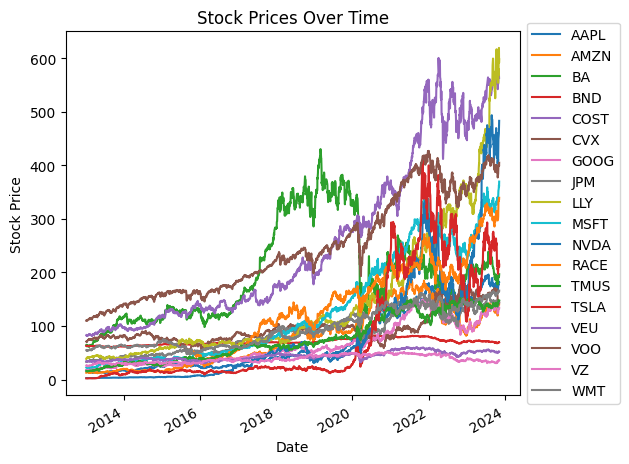

In [179]:
# Make simple line graphic of all stocks and etfs over time

print(pre_data_adj_close.columns) # to check against legend

# Function for simple price graphic. 
# Inputs: (1) dataframe of price data, (2) name of file to save, (3) size.

def simple_price_graphic(stock_df, save_as, size = 'full'):
    
    sizes = {'full': (9, 5), '3-quarters': (9, 4.5), 'half': (4.5, 5)}
    
    if size not in sizes:
        raise ValueError("Size must be 'full', '3-quarters', or 'half'")
        
    plt.figure(figsize=sizes[size])
    
    stock_df.plot(title='Stock Prices Over Time')
    plt.xlabel('Date')  # Optional: add label for x-axis
    plt.ylabel('Stock Price')  # Optional: add label for y-axis
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.savefig(save_as)
    plt.show()

# call the simple price graphic
simple_price_graphic(pre_data_adj_close, '1 - all stock prices chart.png', '3-quarters')

In [10]:
# Function for normalizing data and making graphic based on normalized data
# - normalize the price data, first date = 1, x 100 to put into % terms relative to start
# Inputs: (1) dataframe of stock prices, (2) name of file, (3) size of graphic, (4) list of stocks to remove

def normalize_price_graphic(stocks_df, save_as, size = 'full', remove_stocks=None):
    
    # Checks to see if you want any stocks removed
    if remove_stocks is not None:
        if isinstance(remove_stocks, str):
            remove_stocks = [remove_stocks]
        
        stocks_df_cleaned = stocks_df.drop(columns=remove_stocks)
    else:
        stocks_df_cleaned = stocks_df
    
    # Set sizes of graphics
    
    sizes = {'full': (9, 5), '3-quarters': (9, 4.5), 'half': (4.5, 5)}
    
    if size not in sizes:
        raise ValueError("Size must be 'full', '3-quarters', or 'half'")
        
    # normalize price data to beginning period = 1.0

    normalize_price_data = stocks_df_cleaned / stocks_df_cleaned.iloc[0]
    
    # make the graphic
    
    normalize_price_data.plot(title='Stock Prices Over Time - Normalized')
    plt.xlabel('Date')  # Optional: add label for x-axis
    plt.ylabel('Normalized Units')  # Optional: add label for y-axis
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.text('2013-01-02', -0.2, 'Note: Jan 1, 2013 = 1', ha='left', va='center')
    #plt.annotate('Note: Jan 1, 2013 = 1', xy=(1, -0.1), xycoords='axes fraction', ha='right', va='top')
    plt.annotate('Note: Jan 1, 2013 = 1.0', xy=(.1, .9), xycoords='axes fraction', ha='left', va='top', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(save_as)
    plt.show()
    


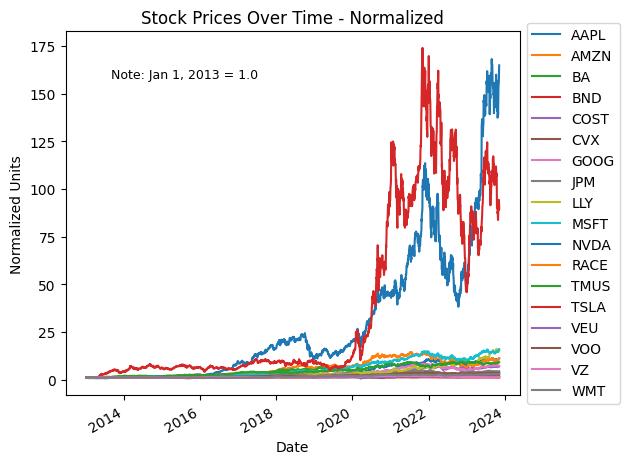

In [11]:
normalize_price_graphic(pre_data_adj_close, '2 - all stocks normalized.png', 'full', remove_stocks=None)

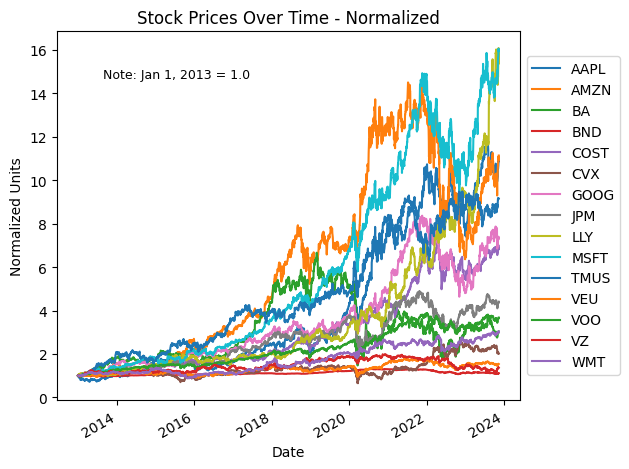

In [15]:
# Remove RACE because data goes back to 2015, not 2013
# Remove NVDA and TESLA to see how the others look without those two distorting

normalize_price_graphic(pre_data_adj_close, '3 - price chart, remove race nvda tsla.png', 'full', ['RACE', 'NVDA', 'TSLA'])

In [102]:
pre_returns = pre_data_adj_close.pct_change()

print('Check original price data:')
print(pre_data_adj_close.head(2))

print('Check dataframe as expected:')
print(pre_returns.head(2))

# Note: this produces  warning about fill methods being deprecated in the future.
# I am not going to make changes NOW to get rid that warning message.
# I will later if it is necessary to keep the code working.

# ***********************************************************************************************
#To eliminate this warning for the rest of the project, I implement this warning suppression:

import warnings

# Suppress FutureWarnings specifically related to DataFrame.pct_change
warnings.filterwarnings('ignore', category=FutureWarning, message=".*DataFrame.pct_change.*")

# ***********************************************************************************************



Check original price data:
                 AAPL     AMZN         BA        BND       COST        CVX  \
Date                                                                         
2013-01-02  16.791182  12.8655  64.583862  62.888824  82.717545  70.976349   
2013-01-03  16.579245  12.9240  64.919029  62.701477  83.565491  70.674156   

                 GOOG        JPM        LLY       MSFT      NVDA  RACE  \
Date                                                                     
2013-01-02  18.013729  33.084869  38.496723  22.620340  2.936236   NaN   
2013-01-03  18.024191  33.018185  38.660007  22.317312  2.938544   NaN   

                 TMUS      TSLA        VEU         VOO         VZ        WMT  
Date                                                                          
2013-01-02  16.073818  2.357333  33.969959  109.915642  26.177029  54.823963  
2013-01-03  15.957821  2.318000  33.648457  109.816925  26.052853  54.475586  
Check dataframe as expected:
                AA

/var/folders/h6/8wy6vc4x2736k_sk6dkm4dl80000gn/T/ipykernel_7584/4203597514.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  pre_returns = pre_data_adj_close.pct_change()


In [103]:
pre_mean_returns = pre_returns.mean()

#Convert to percent only for graphics
pre_mean_returns_pct = pre_mean_returns * 100
print(pre_mean_returns_pct)

AAPL    0.104099
AMZN    0.109449
BA      0.069453
BND     0.004253
COST    0.079556
CVX     0.041765
GOOG    0.087711
JPM     0.068077
LLY     0.113385
MSFT    0.115752
NVDA    0.226356
RACE    0.111039
TMUS    0.096821
TSLA    0.229415
VEU     0.021340
VOO     0.053565
VZ      0.018283
WMT     0.048518
dtype: float64


In [104]:
# Bar chart of expected mean daily returns for complete list of stocks

# Need to make the pandas series of mean returns for period.
# Inputs: (1) Series of mean returns, (2) save as file name, (3) 'Yes' if want converted to actual %

def mean_returns_bar_chart(mean_series, save_as, convert_to_pct = 'Yes'):
    
    if convert_to_pct == 'Yes':
        mean_returns = mean_series * 100
    else:
        mean_returns = mean_series
    
    #pre_mean_returns_pct = mean_series * 100
    
    ax = mean_returns.plot(kind='bar', figsize=(10, 4.5), color='skyblue')

    # Set labels and title
    ax.set_ylabel('Mean Daily Return (%)')
    ax.set_xlabel('Stocks')
    ax.set_title('Mean Daily Returns')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Ensure everything fits without overlapping
    plt.tight_layout()
    
    # Save figure to folder
    plt.savefig(save_as)

    # Show the plot
    plt.show()


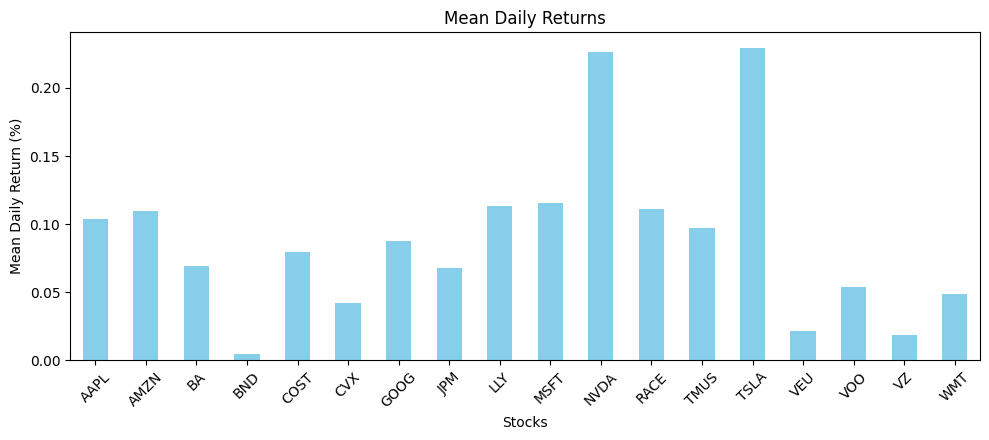

In [105]:
# Produce bar chart of mean returns using function

mean_returns_bar_chart(pre_mean_returns, '4 - mean returns of pre all stocks.png', 'Yes')

In [106]:
# Produce series of variance
# Produce series of standard deviations

pre_variance_returns = pre_returns.var()
pre_std_returns = pre_returns.std()

In [107]:
#Uncomment to print to check values.

#print(pre_variance_returns)
#print(pre_std_returns)

In [108]:
# Create functiomn that plots out mean returns next to standard deviation

# Function produces side-by-side bar chart.
# Inputs: (1) series of mean returns, (2) save file as name, (3) series of standard returns (both drom same df)

def mean_std_bar_chart(mean_series, save_as, std_series):
    
    ax = plt.figure(figsize=(10, 5)).gca()

    # Define the positions of the bars
    barWidth = 0.3
    r1 = np.arange(len(mean_series))
    r2 = [x + barWidth for x in r1]

    # Create bar plot
    ax.bar(r1, mean_series, color='blue', width=barWidth, edgecolor='grey', label='mean')
    ax.bar(r2, std_series, color='red', width=barWidth, edgecolor='grey', label='std')

    # Add labels, title, and legend
    ax.set_xlabel('Stocks', fontweight='bold')
    ax.set_ylabel('Values')
    ax.set_title('Mean and Standard Deviation of Daily Returns')
    ax.set_xticks([r + barWidth/2 for r in range(len(mean_series))], mean_series.index)
    ax.legend()
    
    # Save plot to file
    plt.savefig(save_as)

    # Show the plot
    plt.show()


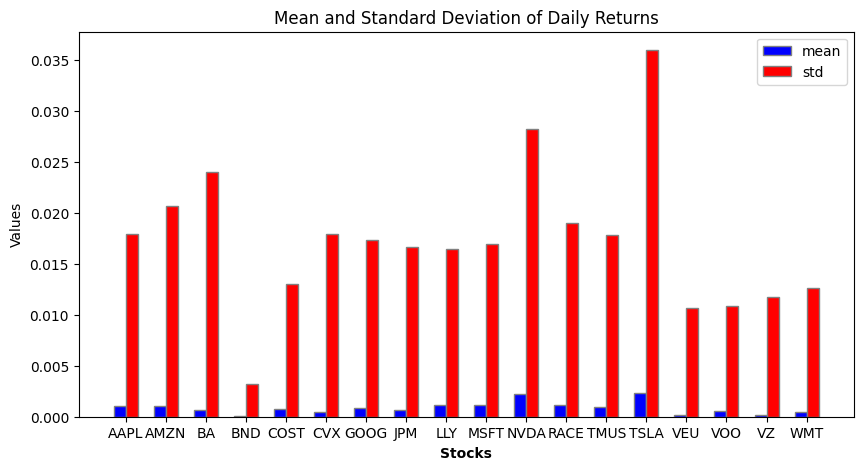

In [109]:
# Create side-by-side bar chart - mean vs std deviation

mean_std_bar_chart(pre_mean_returns, '5 - mean vs std dev bar sidexside bar.png', pre_std_returns)

In [110]:
# The previous chart provides some insight, but I want to make a chart of the risk-reward ratio.
# Equation:  risk-reward = standard deviation / mean return
# Higher Risk-Reward Ratio: For each unit of return, there is less risk. 
#                           It indicates a less risky stock for the given return.

pre_risk_reward = pre_mean_returns / pre_std_returns

In [111]:
print(pre_risk_reward)
print(type(pre_risk_reward))

AAPL    0.057954
AMZN    0.053002
BA      0.028940
BND     0.013328
COST    0.061202
CVX     0.023244
GOOG    0.050651
JPM     0.040878
LLY     0.069092
MSFT    0.068165
NVDA    0.080108
RACE    0.058431
TMUS    0.054465
TSLA    0.063798
VEU     0.019964
VOO     0.049242
VZ      0.015555
WMT     0.038380
dtype: float64
<class 'pandas.core.series.Series'>


In [112]:
# Function for Risk-Reward bar chart
    # Higher is better.
    # Sorted from highest to lowest
    # Inputs: (1) mean returns series, (2) standard deviation series, (3) save file as name 'str'

# Function produces ordered bar chart of risk-reward ratio.

def risk_reward_bar_chart(mean_series, std_series, save_as):
    
    # create risk-reward ratio
    risk_reward = mean_series / std_series
    
    risk_reward_sorted = risk_reward.sort_values(ascending=False)

    ax = risk_reward_sorted.plot(kind='bar', figsize=(10, 4.5), color='skyblue')

    # Set labels and title
    ax.set_ylabel('Ratio')
    ax.set_xlabel('Stocks')
    ax.set_title('Risk-Reward Ratio')

    # Explanatory text added to upper right
    ax.text(0.98, 0.95, 'Higher is better - for each unit of risk you take you get more return',
        transform=ax.transAxes, ha='right', va='top')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Ensure everything fits without overlapping
    plt.tight_layout()
    
    # Save plot to folder
    plt.savefig(save_as)

    # Show the plot
    plt.show()
    plt.clf()
    


## Risk-Reward Ratio

We look at the stocks based on their risk-reward ratio. 

The equation for this is:

    risk-reward = standard deviation / mean return
    
The way to think of his is:  How much return do you get per unit of risk?

A higher ratio from this equation is better.  It means you are getting more return for every unit of risk.



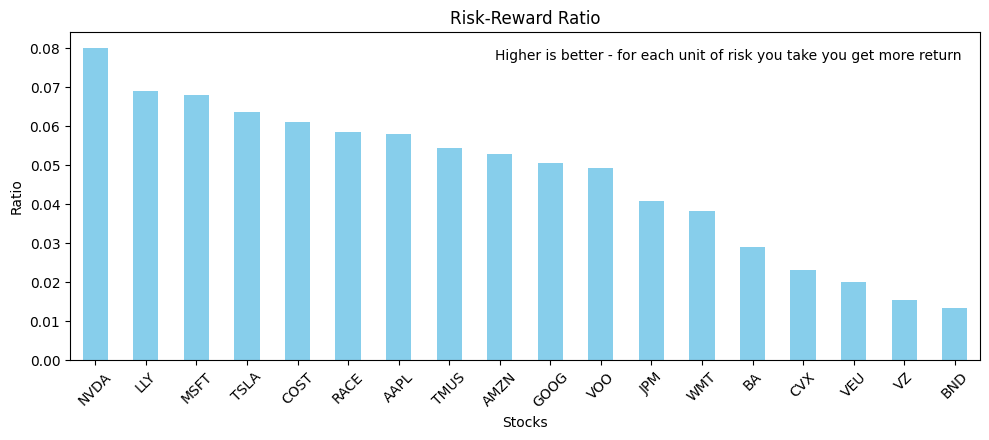

<Figure size 640x480 with 0 Axes>

In [113]:
# Call function to produce ordered bar chart of risk-reward ratios, all stocks

risk_reward_bar_chart(pre_mean_returns, pre_std_returns, '6 - risk reward pre all stocks.png')

In [114]:
# Now make the covariance matrix for the larger set of stocks

pre_cov = pre_returns.cov()

In [115]:
print(pre_cov)

          AAPL      AMZN        BA           BND      COST           CVX  \
AAPL  0.000323  0.000185  0.000165  3.386211e-06  0.000106  1.054114e-04   
AMZN  0.000185  0.000426  0.000143  6.389506e-06  0.000113  7.714025e-05   
BA    0.000165  0.000143  0.000576  8.461821e-06  0.000083  2.139503e-04   
BND   0.000003  0.000006  0.000008  1.018434e-05  0.000003 -8.232770e-07   
COST  0.000106  0.000113  0.000083  3.254923e-06  0.000169  5.923802e-05   
CVX   0.000105  0.000077  0.000214 -8.232770e-07  0.000059  3.228572e-04   
GOOG  0.000176  0.000225  0.000160  4.648035e-06  0.000099  1.027618e-04   
JPM   0.000124  0.000103  0.000224 -3.781946e-06  0.000073  1.788465e-04   
LLY   0.000085  0.000075  0.000075  3.651618e-06  0.000067  7.592862e-05   
MSFT  0.000190  0.000208  0.000153  5.216748e-06  0.000110  1.090325e-04   
NVDA  0.000268  0.000287  0.000232  6.309853e-06  0.000142  1.395947e-04   
RACE  0.000172  0.000175  0.000210  7.111958e-06  0.000098  1.256523e-04   
TMUS  0.0001

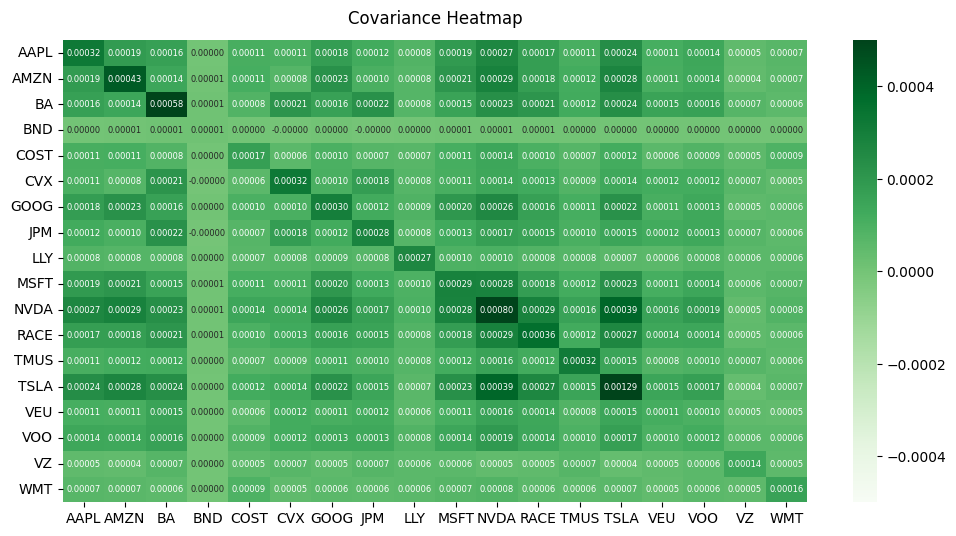

<function matplotlib.pyplot.clf() -> 'None'>

In [116]:
# Make covariance heatmap

plt.figure(figsize = (12,6))
cov_returns_heatmap = sns.heatmap(pre_cov, vmin=-0.0005, vmax=0.0005, annot=True, fmt='.5f', cmap='Greens', annot_kws={"size": 6})
cov_returns_heatmap.set_title('Covariance Heatmap', fontdict={'fontsize':12}, pad=12)
#uncomment to save figure if required
#plt.savefig('What Does The Covariance Heat Map Look Like.png', dpi = 300, bbox_inches = 'tight')

# Save graphic to file in folder
plt.savefig('7 - covariance heat map, all stocks.png')

# show graphic
plt.show()
plt.clf



In [117]:
# Covariance numbers are not standardize and generally very small.  
# Correlative is standardize, varying between -1 and 1, and easier to interpret.
# I conduct evaluation based on correlation numbers.

pre_corr = pre_returns.corr()

In [118]:
print(type(pre_corr))
print(pre_corr)

<class 'pandas.core.frame.DataFrame'>
          AAPL      AMZN        BA       BND      COST       CVX      GOOG  \
AAPL  1.000000  0.499009  0.381873  0.059072  0.452728  0.326602  0.565274   
AMZN  0.499009  1.000000  0.289289  0.096957  0.419789  0.207900  0.629217   
BA    0.381873  0.289289  1.000000  0.110486  0.265605  0.496156  0.385439   
BND   0.059072  0.096957  0.110486  1.000000  0.078463 -0.014357  0.084108   
COST  0.452728  0.419789  0.265605  0.078463  1.000000  0.253622  0.438223   
CVX   0.326602  0.207900  0.496156 -0.014357  0.253622  1.000000  0.330264   
GOOG  0.565274  0.629217  0.385439  0.084108  0.438223  0.330264  1.000000   
JPM   0.414097  0.300213  0.561395 -0.071161  0.338648  0.597676  0.425897   
LLY   0.287672  0.221679  0.190538  0.069726  0.315753  0.257499  0.302589   
MSFT  0.621323  0.594237  0.374407  0.096264  0.496551  0.357341  0.680819   
NVDA  0.527433  0.491816  0.341887  0.069974  0.387010  0.274946  0.532485   
RACE  0.488963  0.440655  

In [186]:
# Function that produces a heat map of correlations between stocks
# Inputs: First make correlation dataframe from returns dataframe. Input that object to function
# Note that fmt='.2f' rounds values to 2 decimals. Increase that to get more decimals.

def corr_heat_map(corr_df, save_as):
    plt.figure(figsize = (12,6))
    corr_returns_heatmap = sns.heatmap(corr_df, vmin=-1.0, vmax=1.0, annot=True, fmt='.2f', cmap='Greens', annot_kws={"size": 6})
    corr_returns_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
    #uncomment to save figure if required
    #plt.savefig('What Does The Correlation Heat Map Look Like.png', dpi = 300, bbox_inches = 'tight')

    # save chart file to folder
    plt.savefig(save_as, bbox_inches='tight')
    
    # show graphic
    plt.show()

    # clear graphic to avoid overlap with next plots
    plt.clf()


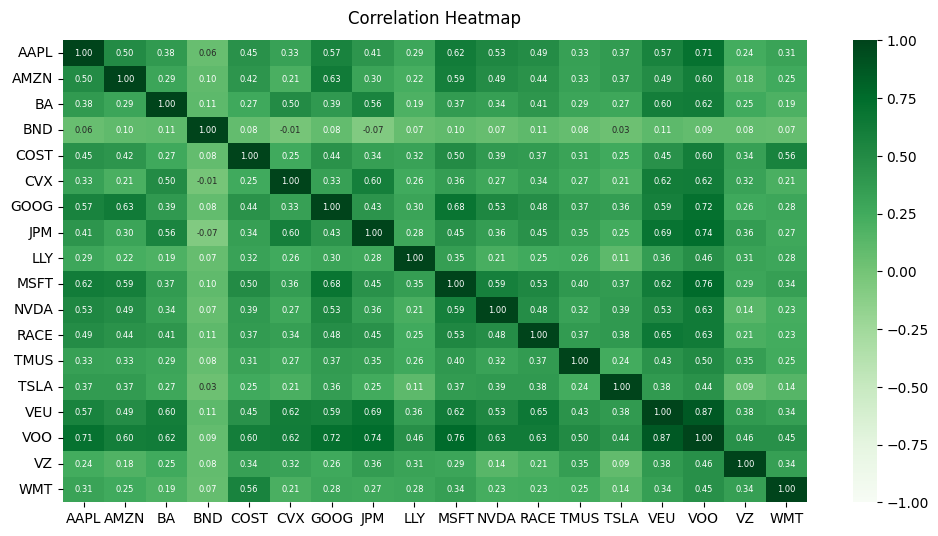

<Figure size 640x480 with 0 Axes>

In [187]:
# Produce correlation heatmap using corr_heat_map function

corr_heat_map(pre_corr, '8 - correlation heat map, all stocks.png')

# 4) Choosing Our Portfolio

Based on our criteria, our first step is to choose 1 stock per sector.

NVDA, BA, LLY, JPM are alone in their sectors. BND is a bond ETF.

Stocks from the same sector or that are closely related:

* TMUS and VZ
* AMZN, MSFT, GOOG, and AAPL
* COST, WMT, and AMZN
* TSLA and RACE

## TMUS vs VZ

Verizon is the largest mobile service provider in the US.  T-Mobile is in a challenger position relative to Verixon.  While we generally focus on the leader in an industry, this can factor in more than current market share.  T-Mobile is a leadership position in 5G, with the largest national footprint and most economical 5G radio spectrum position (2.5G). T-Mobile is the fastest growing of the 3 major mobile service providers.  T-Mobile has an incredibly attractive **PEG ratio of only 0.31** compared to Verizon's 7.46. While T-Mobile has a higher degree of variance than Verizon, the risk-reward equation heavily favors T-Mobile. 

**Our choice:  TMUS**

## AMZN, MSFT, GOOG, AAPL

Not suprisingly, Amaxon, Microsft, Alphabet, and Apple are all highly correlated with each other.  They are also highly correlated with the overall S&P 500.  This is because they are 4 of the largest technology companies in the world, they are part of well publicized Big Tech indexes like "FANG" and lately "The Magnificent 7", and they are each major components of the S&P 500.

### Apple

Apple has enjoyed an incredrible run over the past 10 years. However, it's growth has slowed while it is still richly valued with a forward PE multiple of 28 and a PEG ratio of 4.56 (the highest of this group).  Apple has the largest market cap of any stock, currently at $2.82T. We eliminate Apple simply because it's stock market valuation is not in line with growth potential compared to other companies in the sector.

### Microsoft

Like Apple, Microsoft has demonstrated superb performance over the past 10 (and longer) years.  Microsoft has a leadership position in B2B software, cloud services (SaaS), and is in second place in cloud infrastructure (Azure). It has a high forward PE multiple of 30 but an attractive PEG ratio of only 2.02.  Microsoft has a market cap of $2.57T, 2nd largest of any publicly traded company. Microsoft is the most correlated with the S&P500.  This is a difficult chocie, but we eliminate Microsoft based on it's rich valuation. 

### Alphabet

Alphabet has had amazing performance over the past 10 years.  Alphabet meets our criteria of being the dominant company in it's industry, with a 90% market share in Internet search, and the dominant digital advertising platform. YouTube is actually the most watched of any video content platform, including compared to all of the TV networks and all of the video streaming companies.  Alphabet has strong long terms prospects in AI, but is an "also ran" in cloud services. Alphabet has a high market cap of $1.59T, but what we assess to be a reasonable forward PE ration of 22 and an attractive PEG ratio of only 1.29.  Based on the strong position of Alphabeet and fundamentals, we keep it in the portfolio.

### Amazon

Out of the 4 companies, Amazon is the most diversified.  It is the undisputed leader in e-commerce.  It has the largest cloud infrustucture service in the world with AWS.  S&P actually puts Amazon into the Consumer Discretionary industry sector because of e-commerce, but Amazon arguably has one of the world's largest technology platforms. Amazon has a large market cap of $1.44T and a large forward PE ratio for a company of its size at 52.  However, with it's strong project earnings growth, Amazon has a **PEG ratio of only 0.80**.   
Among Big Tech companies, we recommend including Amazon in the client's porfolio.  As we will see below, we also recommend keep Amazon in the porfolio for specifically relative to other Consumer Discretionary companis.

**Our Choices:  GOOG and AMZN**


## COST, WMT, and AMZN

Costco and Amazon are included by S&P in the Consumer Discretionary sector, while Walmart is classied as Consumer Stables.  Despite that different, we consider these three companies to be closely related in terms of their massive retail operations.  

Costco is a very well positioned company as the gloabl leader in wharehouse retail. But Costco has a rich valuation with a forward PE multiple of 35 and a PEG ratio of 4.84.  Walmart is the largest retailer in the world, but also has a rich valuation with a forward PE multiple of 25 and a PEG ratio of 4.26. We think perhaps these two companies are already at the upper bounds of their potential and, in to extent that they can continue to grow rapidly, this is already priced into their stock price.

Among this group of 3 massive retailers, Amazon is a the unique position of being by far the dominant e-commerce retailer.  E-commerce will only continue to grow relative to brick-and-mortar retail.  Costco and Walmart have been growing their e-commerce operations, but they are very far behind Amazon.  Meanwhile, with a PEG ratio of only 0.8, Amazon's stock price has room to grow based on valuation.  We recommend Amazon as the long term play in this space as well as cloud (see above).

**Our Choice:  AMZN**

## TSLA vs. RACE

Tesla and Ferrari are both auto manufactures and both included in the S&P Consumer Discretionary industry sector.  They are very different companies in many respects.  Tesla delivers EV's from mid market to luxury.  Ferrari is purely a luxury brand; one of the most exclussive.  Because they are both automanufacturers, we choose just one. Difficult choice. Considering growth potential, we chose TSLA.

**Our Choice: TSLA**



# The Rest of Our Stock Portfolio

Reviewing of the rest of our portfolio, we analyzed each stock to consider individually.

## Nvidia 'NVDA'

Nvidia is has long been the leader in GPU's.  In the past year, AI has exploded and GPU's are fundamental to AI.  For a young investor positioning an investment portfolio for the future, it is impossible to ignore AI.  And there impossible to ignore Nvidia.  On many valuation metrics, Nvidia is outstanding.  Nvidia has demonstrated incredible returns with the best risk-reward ratio of all the stocks evaluated. Nvideo also has a very reasonable **PEG ratio of only 1.26**, among the lowest of the stocks considered.  

## Boeing 'BA'
 
Boeing is a bit of an enigma.  We included Boeing in our initial portfolio analysis in order to have exposure to an major Industrials sector company.  While Boeing has received a lot of bad press recently and it's stock has suffered.  It has taken earnings hits as it deals with a number of issues.  However, we believe there is much to like about Boeing going forward.  

Boeing and Airbus enjoy a duopoly. Boeing has an order back log of 4,578 planes.  Because of it's recent problems, with 4 quarters in a row of negative earnings, Boeing's stock price is down by more than 50% since its peak in 2019. Boeing has some risk, but it has the potential be be a stable, long term growth component of a portfolio, acquired today at a discounted price.  It's market cap is only $114B.  Importantly, Boeing also is not highly correlated with the other stocks in the porfolio, providing a degree of diversification.

## Eli Lilly 'LLY'

The Health Care sector generally moves independent of the overall economy and is not highly correlated with other industry sectors.  Demand for Health Care is realively inelastic.  Thus we recommend including a leading company from the Health Care sector in most portfolios.

Our choice for this role is Eli Lilly.  Eli Lilly is a leader in pharmacueticals with an enviable group of drugs still under patent protect, including some recent potential blockbusters, such as Mounjaro.  While Eli Lilly has a rich forward PE multiple of 82, it has a more reasonable PEG ratio of 2.94 thanks to its rapid projected earnings growth.  Eli Lilly is second only to Nvidia in its risk-reward profile.

## JP Morgan Chase 'JPM'

JP Morgan Chase is one of the largest banks in the country.  It has major retail, commercial, and investment banking operations.  Being so large, JPM is highly correlated with the overall S&P 500 index, but is not strongly correlated with some of other stocks we choose. Due to the recent rapid rise in interest rates, stocks in the financial sector has been hit fairly hard.  We believe this is a good time to take a long term position in one of the leading financial institutions in the country.

## Chevron 'CVX'

We wanted to consider an energy stock because they tend to not be strong correlated with technology stocks.  However, we have decide that the overall metrics of Chevron do not justify inclussion.  Chevron has had relatively weak returns compared to the other stocks in our portfolio, but it is in the middle of the pack in terms of variance (risk), with it's risk-return profile is among the worst.  Our thesis is that ICE autos will be replaces by EV's, which does not bode well for an energy company like Chevron.  

**We keep: NVDA, BA, LLY, JPM**
**We remove: CVX**


## S&P500 'VOO'

In order to guarantee a component of broad diversification, we include VOO in the portfolio.  

## International

As noted, we generally recommend international exposure.  However, Vangaurd FTSE All World Ex US has been highly correlated with the S&P500 over the past 10 years, with a correlation coefficient of 0.87.  VEU's returns have been minimal and its risk-reward profile is unattractive.

**VEU was not included in final portfolio**

## Bonds

For the purposes of analysis, we included the broad-based bond ETF Vanguard Total Bond Market 'BND'.  Many investment advisors will recommend a fixed percentage of bonds in a portfolio based on the age of the client. However, for a young client, TCG does not include bonds in the initial portfolio.  Bonds can be included at a later date to anchor a portfolio when the client wishes to reduce overall risk exposure.

**BND was not inclused in final portfolio**


In [121]:
# START FINAL PHASE OF ANALYSIS

# 5)  Recommended Portfolio

Based on our analysis, our final recommemned portfolio components are:

### Individual Company Stocks:
* Amazon 'AMZN'
* Boeing 'BA'
* Alphabet 'GOOG'
* JP Morgan Chase 'JPM'
* Eli Lilly 'LLY'
* Nvidia 'NVDA'
* T-Mobile US 'TMUS'
* Tesla 'TSLA'

### Diversified ETF:
* Vanguard S&P 500 'VOO'





**As noted, bond and direct international exposure were not included**





In [180]:
# Based on the previous analysis, I remove the following from the recommended portfolio

remove_stocks = ['WMT', 'COST', 'AAPL', 'MSFT', 'VZ', 'CVX', 'VEU', 'RACE', 'BND']
final_portfolio = pre_data_adj_close.drop(columns = remove_stocks)

# Final portfolio with 'BND' for later comparison of efficient frontier with bonds included

remove_except_bnd = ['WMT', 'COST', 'AAPL', 'MSFT', 'VZ', 'CVX', 'VEU', 'RACE']
final_port_plus_bnd = pre_data_adj_close.drop(columns = remove_except_bnd)

In [123]:
print(final_portfolio.head(2))

               AMZN         BA       GOOG        JPM        LLY      NVDA  \
Date                                                                        
2013-01-02  12.8655  64.583862  18.013729  33.084869  38.496723  2.936236   
2013-01-03  12.9240  64.919029  18.024191  33.018185  38.660007  2.938544   

                 TMUS      TSLA         VOO  
Date                                         
2013-01-02  16.073818  2.357333  109.915642  
2013-01-03  15.957821  2.318000  109.816925  


<Figure size 900x450 with 0 Axes>

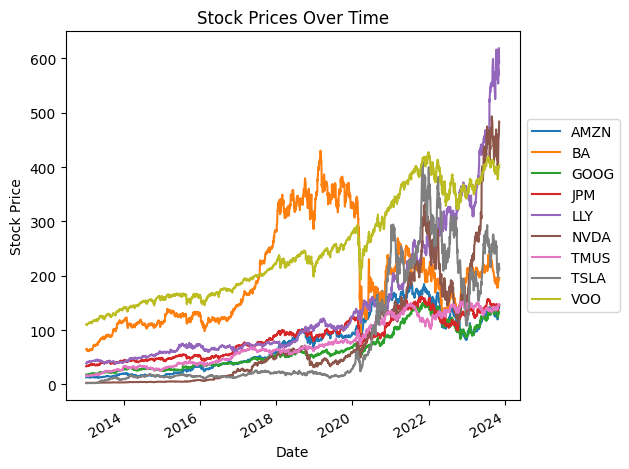

In [124]:
# Produce simple price graphic of selected portfolio

simple_price_graphic(final_portfolio, '9 - simple price chart, chosen portfolio.png', '3-quarters')

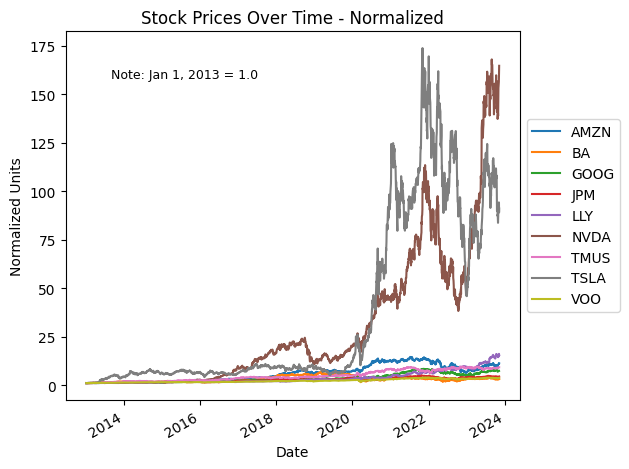

In [125]:
# Produce normalized price line chart of selected portfolio

normalize_price_graphic(final_portfolio, '10 - normalized price graphic, all chosen port.png', 'full', remove_stocks=None)


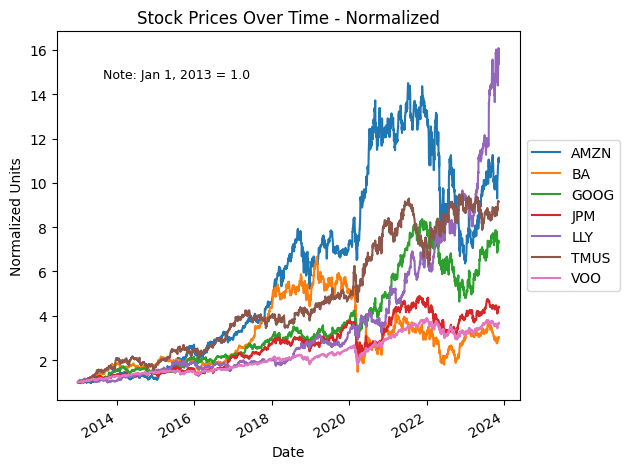

In [126]:
# remove NVDA and TSLA so can see relationships between the rest of stocks
# note: see how the others look without those two distorting

normalize_price_graphic(final_portfolio, '11 - normalized, chosen, less nvda tsla.png', 'full', remove_stocks=['NVDA', 'TSLA'])

In [127]:
# Make object with final portfolio expected returns
final_portfolio_returns = final_portfolio.pct_change()

# Make object with mean expected returns
final_portfolio_mean_returns = final_portfolio_returns.mean()

print('FINAL PORTFOLIO RETURNS DATAFRAME:')
print(final_portfolio_returns.head(2))
print('')
print('FINAL PORTFOLIO MEAN DAILY RETURNS:')
print(final_portfolio_mean_returns)
print(len(final_portfolio_mean_returns))
print(type(final_portfolio_mean_returns))

# *****************************************************************************************
# Just for later comparison of efficient frontier, produce final portfolio WITH bonds BND
final_port_plus_bnd_returns = final_port_plus_bnd.pct_change()

print('FINAL PORTFOLIO PLUS BONDS - FOR LATER COMP')
print(final_port_plus_bnd_returns.head(2))

FINAL PORTFOLIO RETURNS DATAFRAME:
                AMZN       BA      GOOG       JPM       LLY      NVDA  \
Date                                                                    
2013-01-02       NaN      NaN       NaN       NaN       NaN       NaN   
2013-01-03  0.004547  0.00519  0.000581 -0.002016  0.004242  0.000786   

                TMUS      TSLA       VOO  
Date                                      
2013-01-02       NaN       NaN       NaN  
2013-01-03 -0.007217 -0.016685 -0.000898  

FINAL PORTFOLIO MEAN DAILY RETURNS:
AMZN    0.001094
BA      0.000695
GOOG    0.000877
JPM     0.000681
LLY     0.001134
NVDA    0.002264
TMUS    0.000968
TSLA    0.002294
VOO     0.000536
dtype: float64
9
<class 'pandas.core.series.Series'>
FINAL PORTFOLIO PLUS BONDS - FOR LATER COMP
                AMZN       BA       BND      GOOG       JPM       LLY  \
Date                                                                    
2013-01-02       NaN      NaN       NaN       NaN       NaN       N

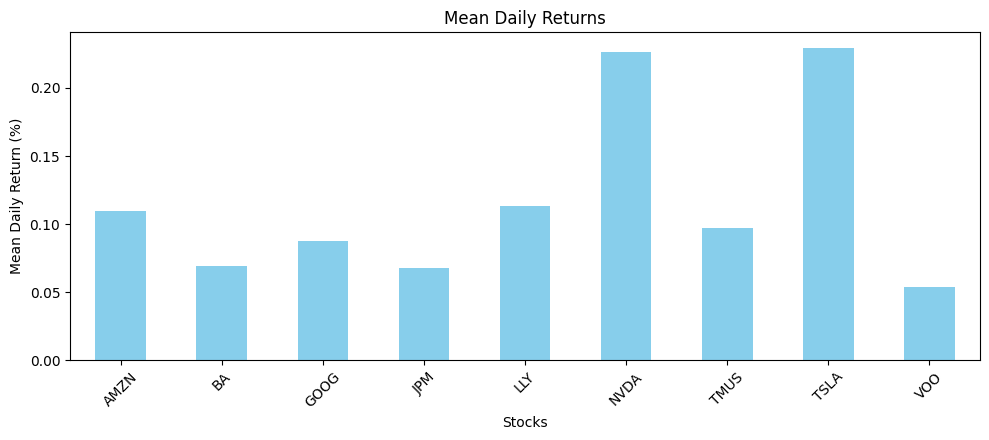

In [128]:
# Produce bar chart of mean returns of selected portfolio using function

mean_returns_bar_chart(final_portfolio_mean_returns, '12 - final portfolio mean returns.png', 'Yes')

In [129]:
# Produce series of variance from expected returns of final portfolio
# Produce series of standard deviations from expected returns of final portfolio

final_portfolio_variance = final_portfolio_returns.var()
final_portfolio_std = final_portfolio_returns.std()

In [130]:
print('FINAL PORTFOLIO VARIANCE VALUES:')
print(final_portfolio_variance)
print(type(final_portfolio_variance))
print('FINAL PORTFOLIO STANDARD DEVIATION VALUES:')
print(final_portfolio_std)
print(type(final_portfolio_std))

FINAL PORTFOLIO VARIANCE VALUES:
AMZN    0.000426
BA      0.000576
GOOG    0.000300
JPM     0.000277
LLY     0.000269
NVDA    0.000798
TMUS    0.000316
TSLA    0.001293
VOO     0.000118
dtype: float64
<class 'pandas.core.series.Series'>
FINAL PORTFOLIO STANDARD DEVIATION VALUES:
AMZN    0.020650
BA      0.023999
GOOG    0.017317
JPM     0.016654
LLY     0.016411
NVDA    0.028256
TMUS    0.017777
TSLA    0.035959
VOO     0.010878
dtype: float64
<class 'pandas.core.series.Series'>


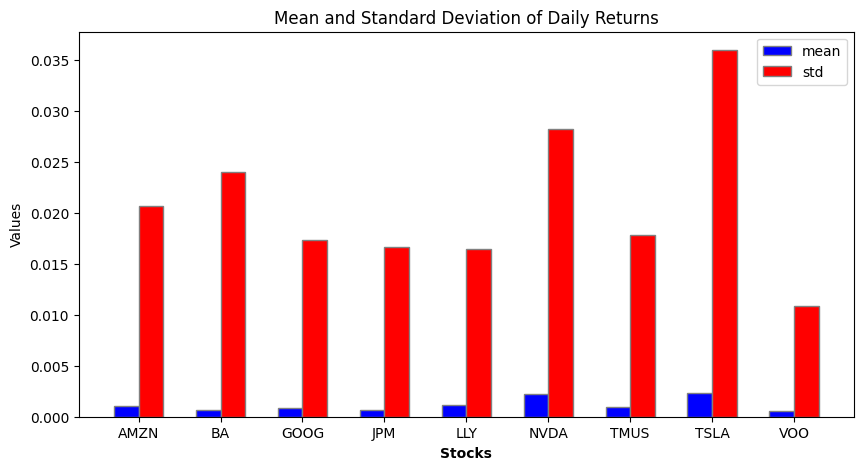

In [131]:
# Now plot out mean returns next to standard deviation

# Function produces side-by-side bar chart.
# Inputs: (1) series of mean returns, (2) series of standard returns (both drom same df)

mean_std_bar_chart(final_portfolio_mean_returns, '13 - mean x std dev bar, final port.png', final_portfolio_std)

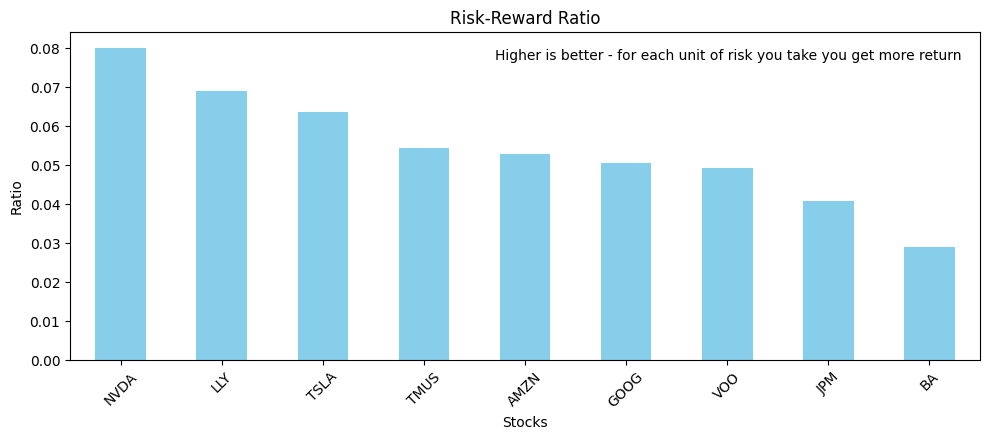

<Figure size 640x480 with 0 Axes>

In [132]:
# Risk-reward Ratio
# Bar chart for risk-reward ratio for complete list of stocks
# Higher is better.
# Sorted from highest to lowest
# Inputs: (1) mean returns series, (2) standard deviation series

# Produce ordered bar chart of risk-reward ratio using function 

risk_reward_bar_chart(final_portfolio_mean_returns, final_portfolio_std, '14 - risk-reward bar, final port.png')

In [133]:
# Make co-variance dataframe. Used later in portfolio optimization.

final_portfolio_cov = final_portfolio_returns.cov()

In [181]:
# As seen above, covariance numbers are not standardize and generally very small.  
# Correlation numbers are standardize, varying between -1 and 1, and easier to interpret.
# Evaluation based on correlation numbers.

# Make final portfolio correlation
final_portfolio_corr = final_portfolio_returns.corr()

print(final_portfolio_corr)

          AMZN        BA      GOOG       JPM       LLY      NVDA      TMUS  \
AMZN  1.000000  0.289289  0.629217  0.300213  0.221679  0.491816  0.325718   
BA    0.289289  1.000000  0.385439  0.561395  0.190538  0.341887  0.292840   
GOOG  0.629217  0.385439  1.000000  0.425897  0.302589  0.532485  0.367381   
JPM   0.300213  0.561395  0.425897  1.000000  0.281009  0.358300  0.351231   
LLY   0.221679  0.190538  0.302589  0.281009  1.000000  0.214429  0.263598   
NVDA  0.491816  0.341887  0.532485  0.358300  0.214429  1.000000  0.318381   
TMUS  0.325718  0.292840  0.367381  0.351231  0.263598  0.318381  1.000000   
TSLA  0.372712  0.274248  0.357654  0.246943  0.111651  0.387966  0.237450   
VOO   0.604099  0.618235  0.716660  0.739797  0.462677  0.630646  0.503553   

          TSLA       VOO  
AMZN  0.372712  0.604099  
BA    0.274248  0.618235  
GOOG  0.357654  0.716660  
JPM   0.246943  0.739797  
LLY   0.111651  0.462677  
NVDA  0.387966  0.630646  
TMUS  0.237450  0.503553  
TSL

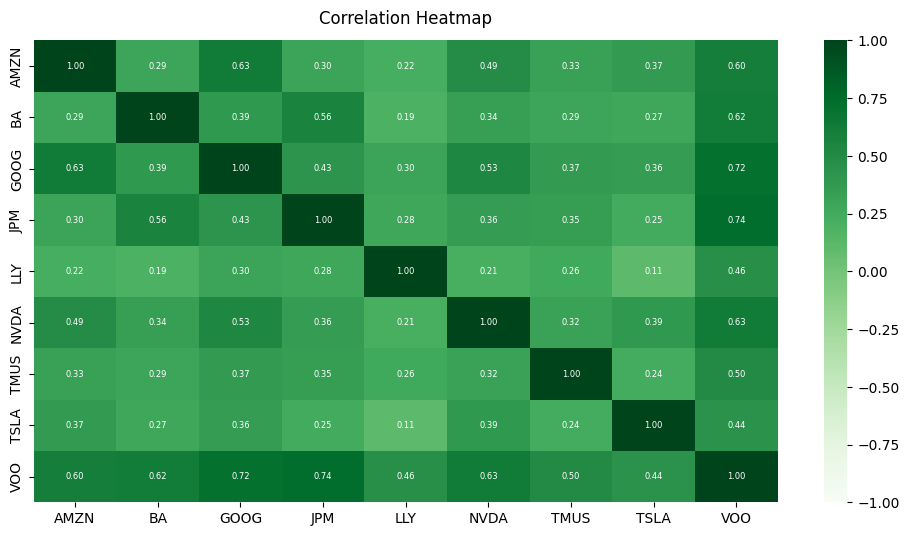

<Figure size 640x480 with 0 Axes>

In [135]:
# Produce the correlation heat map on the final portfolio, rounded to 2 decimals

corr_heat_map(final_portfolio_corr, '15 - corr heat map, final port.png')

# 6)  Portfolio Optimization

Now we will produce the Efficient Frontier of different weightings for the final portfolio.  "Efficient Frontier" is just a fancy way of saying that we will calculate the weighings for each component of the portfolio such that we are maximizing the expected return at each level of risk.  (Conversely, minimizing risk for expected rerturns).  This will yield a range of portfolio weighting options at variouis levels of risk (or risk tolerance).  If past patterns for the stocks in this porfolio extend into the future, higher risk yields higher returns.

In [136]:
print(type(final_portfolio_returns))
print(final_portfolio_returns.head(2))
print(final_portfolio_returns.head(5)[1:])
print(type(final_portfolio_cov))
print(final_portfolio_cov)


<class 'pandas.core.frame.DataFrame'>
                AMZN       BA      GOOG       JPM       LLY      NVDA  \
Date                                                                    
2013-01-02       NaN      NaN       NaN       NaN       NaN       NaN   
2013-01-03  0.004547  0.00519  0.000581 -0.002016  0.004242  0.000786   

                TMUS      TSLA       VOO  
Date                                      
2013-01-02       NaN       NaN       NaN  
2013-01-03 -0.007217 -0.016685 -0.000898  
                AMZN        BA      GOOG       JPM       LLY      NVDA  \
Date                                                                     
2013-01-03  0.004547  0.005190  0.000581 -0.002016  0.004242  0.000786   
2013-01-04  0.002592  0.002840  0.019760  0.017725  0.037007  0.032993   
2013-01-07  0.035925 -0.020080 -0.004363  0.001103 -0.001357 -0.028897   
2013-01-08 -0.007748 -0.026271 -0.001974  0.001981  0.007574 -0.021927   

                TMUS      TSLA       VOO  
Date     

In [137]:
# ADDING A NEW REVISED FUNCTION TO GET A BETTER SPREAD OF WEIGHTS
# I WILL USE BOTH AND CHART BOTH

# THIS SECOND FUNCTION USES A 'DIRICHLET DISTRIBUTION.'
# The Dirichlet distribution is commonly used in cases where one needs to generate 
# random samples of proportions that sum up to 1 and you want can control the concentration 
# of these proportions around the average (avoid bunching up around the mean).

def return_portfolios_dirichlet(expected_returns, cov_matrix, concentration_param=None):
    rng = np.random.default_rng()  # Create a new random number generator instance
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    # Set a default concentration parameter if none provided
    #if concentration_param is None:
        #concentration_param = np.full(shape=num_assets, fill_value=1.0)  # A uniform Dirichlet distribution
    
    # Set a default concentration parameter if None or create an array if a single number is provided
    if concentration_param is None:
        concentration_param = np.full(shape=num_assets, fill_value=1.0)  # A uniform Dirichlet distribution
    elif isinstance(concentration_param, (int, float)):  # If it's a single number
        concentration_param = np.full(shape=num_assets, fill_value=concentration_param)
    
    
    for _ in range(num_portfolios):
        # Sample weights using the Dirichlet distribution
        weights = np.random.dirichlet(alpha=concentration_param)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns, 'Volatility': port_volatility}
    
    for counter, symbol in enumerate(selected):
        portfolio[symbol + ' Weight'] = [weight[counter] for weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    column_order = ['Returns', 'Volatility'] + [stock + ' Weight' for stock in selected]
    df = df[column_order]
   
    return df

In [182]:
# Use function `return_portfolios` to generate 5,000 random portfolios

random_portfolios_dirichlet = return_portfolios_dirichlet(final_portfolio_mean_returns, final_portfolio_cov, concentration_param=.5)

random_portfolios = return_portfolios(final_portfolio_mean_returns, final_portfolio_cov)

In [139]:
# Original random function
print(type(random_portfolios))
print(len(random_portfolios))

# Dirichlet random function
print(type(random_portfolios_dirichlet))
print(len(random_portfolios_dirichlet))

<class 'pandas.core.frame.DataFrame'>
5000
<class 'pandas.core.frame.DataFrame'>
5000


In [140]:
#Original function
print('ORIGINAL FUNCTION RESULTS')
print(random_portfolios.head(2))
print(random_portfolios.tail(2))

print('')
# Dirichlet function
print('DIRICHLET FUNCTION RESULTS')
print(random_portfolios_dirichlet.head(2))
print(random_portfolios_dirichlet.tail(2))

ORIGINAL FUNCTION RESULTS
    Returns  Volatility  AMZN Weight  BA Weight  GOOG Weight  JPM Weight  \
0  0.001093    0.014106     0.230175   0.011959     0.186609    0.095625   
1  0.001110    0.014178     0.098165   0.183291     0.149611    0.008430   

   LLY Weight  NVDA Weight  TMUS Weight  TSLA Weight  VOO Weight  
0    0.060982     0.095228     0.012222     0.081325    0.225873  
1    0.083783     0.177744     0.140448     0.011277    0.147251  
       Returns  Volatility  AMZN Weight  BA Weight  GOOG Weight  JPM Weight  \
4998  0.001216    0.014169     0.205396   0.033188     0.009583    0.126177   
4999  0.000861    0.012107     0.160145   0.007132     0.151583    0.162007   

      LLY Weight  NVDA Weight  TMUS Weight  TSLA Weight  VOO Weight  
4998    0.064034     0.133572     0.187019     0.107061    0.133971  
4999    0.073030     0.014552     0.195035     0.003582    0.232934  

DIRICHLET FUNCTION RESULTS
    Returns  Volatility  AMZN Weight  BA Weight  GOOG Weight  JPM We

In [141]:
# test that all rows total weight = 1
sum_check = random_portfolios.iloc[:, 2:].sum(axis=1)
print(random_portfolios.iloc[0, 2:])
print(random_portfolios.iloc[:1, 2:].sum(axis=1))
print(len(sum_check))
print(sum_check.head(10))
print(sum_check.tail(10))

# here I am checking that all rows weights total 1.0
# temp_dict should come out empty if all rows = 1.0
temp_dict = {}
counter = 0
for index in range(len(sum_check)):
  row_value = round(sum_check.iloc[index], 1)
  if counter < 10:
        print(row_value)
        counter += 1
  if row_value != 1.0:
    temp_dict[index] = row_value
      
print(temp_dict)

# temp_dict is coming out empty, so all weights are = 1.0

AMZN Weight    0.230175
BA Weight      0.011959
GOOG Weight    0.186609
JPM Weight     0.095625
LLY Weight     0.060982
NVDA Weight    0.095228
TMUS Weight    0.012222
TSLA Weight    0.081325
VOO Weight     0.225873
Name: 0, dtype: float64
0    1.0
dtype: float64
5000
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64
4990    1.0
4991    1.0
4992    1.0
4993    1.0
4994    1.0
4995    1.0
4996    1.0
4997    1.0
4998    1.0
4999    1.0
dtype: float64
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
{}


In [142]:
# ALSO RUN CHECK ON DIRICHLET PORTFOLIOS - test that all rows total weight = 1.0
sum_check_dirichlet = random_portfolios_dirichlet.iloc[:, 2:].sum(axis=1)
print(random_portfolios_dirichlet.iloc[0, 2:])
print(random_portfolios_dirichlet.iloc[:1, 2:].sum(axis=1))
print(len(sum_check_dirichlet))
print(sum_check_dirichlet.head(10))
print(sum_check_dirichlet.tail(10))

# here I am checking that all rows weights total 1.0
# temp_dict should come out empty if all rows = 1.0
temp_dict_dirichlet = {}
counter = 0
for index in range(len(sum_check_dirichlet)):
  row_value = round(sum_check_dirichlet.iloc[index], 1)
  if counter < 10:
        print(row_value)
        counter += 1
  if row_value != 1.0:
    temp_dict_dirichlet[index] = row_value
      
print(temp_dict_dirichlet)

# temp_dict is coming out empty, so all weights are = 1.0

AMZN Weight    0.551447
BA Weight      0.156111
GOOG Weight    0.022996
JPM Weight     0.002514
LLY Weight     0.039642
NVDA Weight    0.017897
TMUS Weight    0.002835
TSLA Weight    0.025322
VOO Weight     0.181236
Name: 0, dtype: float64
0    1.0
dtype: float64
5000
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64
4990    1.0
4991    1.0
4992    1.0
4993    1.0
4994    1.0
4995    1.0
4996    1.0
4997    1.0
4998    1.0
4999    1.0
dtype: float64
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
{}


In [143]:
# Check if weights are distributed to high weights also

# Exclude the first two columns ('Returns' and 'Volatility') to get the stock columns
stock_columns = random_portfolios.columns[2:]


# Initialize an empty list to store the results
high_weight_stocks = []

# Iterate over each row and each stock weight column
for index, row in random_portfolios.iterrows():
    for stock in stock_columns:
        if row[stock] > 0.60:  # Check if the stock weight is greater than 0.80
            high_weight_stocks.append((index, stock, row[stock]))

# Convert the list of tuples to a DataFrame for better visualization
high_weight_stocks_df = pd.DataFrame(high_weight_stocks, columns=['Row', 'Stock', 'Weight'])

print('Original random function result:')
print(high_weight_stocks_df)

# *****************************

# DIRICHLET RESULT 
stock_columns_dirichlet = random_portfolios_dirichlet.columns[2:]

# Initialize an empty list to store the results
high_weight_stocks_dirichlet = []

# Iterate over each row and each stock weight column
for index, row in random_portfolios_dirichlet.iterrows():
    for stock in stock_columns_dirichlet:
        if row[stock] > 0.60:  # Check if the stock weight is greater than 0.80
            high_weight_stocks_dirichlet.append((index, stock, row[stock]))

# Convert the list of tuples to a DataFrame for better visualization
high_weight_stocks_df_dirichlet = pd.DataFrame(high_weight_stocks_dirichlet, columns=['Row', 'Stock', 'Weight'])

print('')
print('Dirichlet random function result:')
print(high_weight_stocks_df_dirichlet)



Original random function result:
Empty DataFrame
Columns: [Row, Stock, Weight]
Index: []

Dirichlet random function result:
      Row        Stock    Weight
0      62   VOO Weight  0.690803
1      63  AMZN Weight  0.672889
2      69  NVDA Weight  0.676862
3      83   LLY Weight  0.620285
4     118  AMZN Weight  0.664322
..    ...          ...       ...
398  4934    BA Weight  0.743905
399  4936   JPM Weight  0.871313
400  4956    BA Weight  0.714840
401  4961  GOOG Weight  0.665109
402  4977   JPM Weight  0.730426

[403 rows x 3 columns]


In [206]:
# Make re-usable function that plots out portfolios in df make like `return_portfolios` function above.

def chart_random_portfolios(random_portfolios_df, save_as, dist_type='Standard'):
    random_portfolios_df.plot.scatter(x='Volatility', y='Returns')
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Expected Returns')
    plt.title('Efficient Frontier - ' + dist_type)
    plt.savefig(save_as)
    plt.show()
    plt.clf()  # Clears the current figure
    


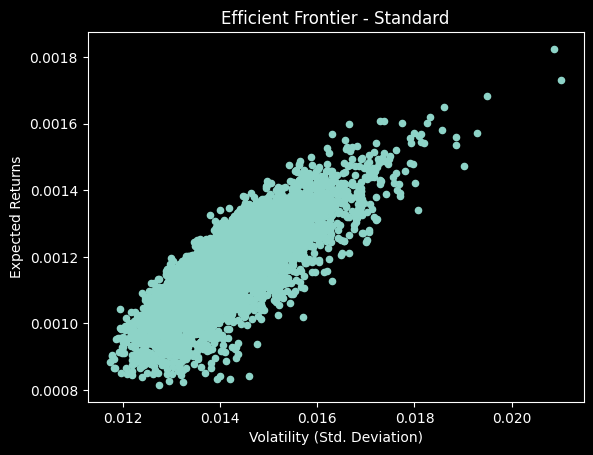

<Figure size 640x480 with 0 Axes>

In [207]:
# Original function: Plot out the total universe of 5,000 random portfolios generated 

chart_random_portfolios(random_portfolios, '16 - standard rand dist, final port.png', 'Standard')

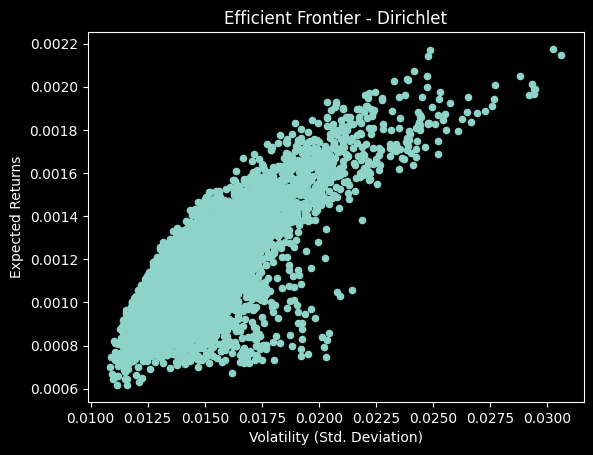

<Figure size 640x480 with 0 Axes>

In [208]:
# Dirichlet based function of same chart shows better spread across weights:

chart_random_portfolios(random_portfolios_dirichlet, '17 - Dirichlet dist, final port.png', 'Dirichlet')

In [183]:
# CHOSE TO REMOVE 'RACE', SO THIS SECTION IS NOT NEEDED.
    
# IF I WANT TO PUT 'RACE' BACK INTO PORTFOLIO, FOLLOW THESE 3 STEPS:
#   1) Now I know I have complete data for RACE begining in row 707.
#   2) Call `optimal_portfolio` passing in final_portfolio_returns starting at line 707
#   3) To call function:  `weights, returns, risks = optimal_portfolio(final_portfolio_returns[707:])`

In [149]:
# Call the old version of the optimal_portfolios function

weights, returns, risks = optimal_portfolio(final_portfolio_returns[1:])


# *********************************************************************************
# Just for comparison, call old optimal_portfolios function with BND included

weights2, returns2, risks2 = optimal_portfolio(final_port_plus_bnd_returns[1:])



     pcost       dcost       gap    pres   dres
 0: -1.1651e-03 -1.0023e+00  1e+00  2e-16  3e+00
 1: -1.1658e-03 -1.2271e-02  1e-02  5e-17  4e-02
 2: -1.2328e-03 -2.3686e-03  1e-03  4e-17  4e-03
 3: -2.1949e-03 -2.7675e-03  6e-04  7e-16  9e-04
 4: -2.2386e-03 -2.2517e-03  1e-05  2e-16  2e-05
 5: -2.2429e-03 -2.2432e-03  3e-07  1e-16  4e-07
 6: -2.2430e-03 -2.2430e-03  3e-09  3e-21  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1639e-03 -1.0023e+00  1e+00  2e-16  3e+00
 1: -1.1647e-03 -1.2268e-02  1e-02  1e-16  4e-02
 2: -1.2315e-03 -2.3654e-03  1e-03  5e-17  4e-03
 3: -2.1914e-03 -2.7599e-03  6e-04  3e-16  8e-04
 4: -2.2340e-03 -2.2485e-03  1e-05  2e-16  2e-05
 5: -2.2384e-03 -2.2388e-03  4e-07  2e-16  4e-07
 6: -2.2385e-03 -2.2385e-03  4e-09  2e-16  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1626e-03 -1.0023e+00  1e+00  3e-16  3e+00
 1: -1.1633e-03 -1.2265e-02  1e-02  6e-17  4e-02
 2: -1.2300e-03 -2.3619e

In [150]:
# Now let's see what weights, returns, and risks look like to know how to work with them
print(type(weights))
print(type(returns))
print(type(risks))


<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>


In [151]:
# This shows function defines "optimal" as 99% in stock with highest risk-reward ratio.
# This seems to be a flaw in the function.

print(weights)

[[2.93222771e-07]
 [2.73749812e-07]
 [2.85299682e-07]
 [2.72827426e-07]
 [2.93564570e-07]
 [2.88249810e-05]
 [2.89783196e-07]
 [9.99969204e-01]
 [2.62435500e-07]]


In [152]:
print(len(returns))
print(returns)

100
[0.0022802280110192806, 0.002279447467020648, 0.002278751773127777, 0.0022781316902977353, 0.0022775789848387402, 0.002277086342471227, 0.0022766472404966813, 0.002276255863129761, 0.002275907027631986, 0.002275596115353119, 0.002275319007432692, 0.002275072030099035, 0.0022748519165947645, 0.0022746557504957025, 0.002274480929256712, 0.0022742843383551713, 0.0022741404727251134, 0.002274062427039595, 0.0022739520666075217, 0.00227385367980023, 0.0022737659071584136, 0.0022736875407386764, 0.002273617240868609, 0.0022735528663272954, 0.0022734877008760493, 0.00227334687769943, 0.002251689415930732, 0.0021607753251679683, 0.0020782472507609455, 0.0020047242528492067, 0.0019392077422022965, 0.0018807632083134552, 0.0018279814849998712, 0.0017712449109473665, 0.001708570168550857, 0.0016522558805862468, 0.0016018771781430767, 0.0015568770729952146, 0.0015083478233479872, 0.0014481571259080948, 0.0013921652164517742, 0.0013425708383259336, 0.0012977614548858724, 0.0012545782145128705, 

In [153]:
print(len(risks))
print(risks)

100
[0.027291782040728112, 0.02701996531081528, 0.026802064119279944, 0.026627685091186137, 0.026488331328972468, 0.026377095672995163, 0.026288387389538908, 0.026217698169778297, 0.02616140354986399, 0.02611659638133671, 0.02608094924693032, 0.026052600597086785, 0.026030062884214077, 0.026012149632318952, 0.025997914584458662, 0.025986111924340836, 0.025976937205636756, 0.025970474556199698, 0.025964800226971504, 0.025960291533050975, 0.025956707943462342, 0.025953858158486106, 0.02595158562660618, 0.025949748493917648, 0.02594814116613647, 0.025945238310432092, 0.025518929189243925, 0.02377237345325808, 0.022258029376746293, 0.020977739241523838, 0.019902201011952995, 0.01900392654173907, 0.018249994002649657, 0.01750095338726531, 0.01672597583865826, 0.0160781948217677, 0.01554277161793315, 0.015102783421256887, 0.0146686059981559, 0.014173239984963419, 0.013748061705738453, 0.013402193173533692, 0.013117604557547093, 0.01286839119838533, 0.012396839601236428, 0.01192990896120984, 

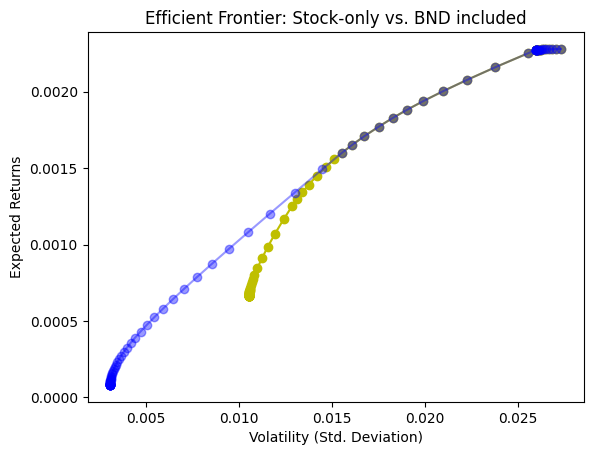

In [232]:
# Quick test plots to see how things look

# Here also including comparison of e.f. with bonds included
plt.plot(risks, returns, 'y-o')
plt.plot(risks2, returns2, 'b-o', alpha = 0.4)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier: Stock-only vs. BND included')
plt.savefig('final - comp ef with and without bonds.png', bbox_inches='tight')
plt.show()


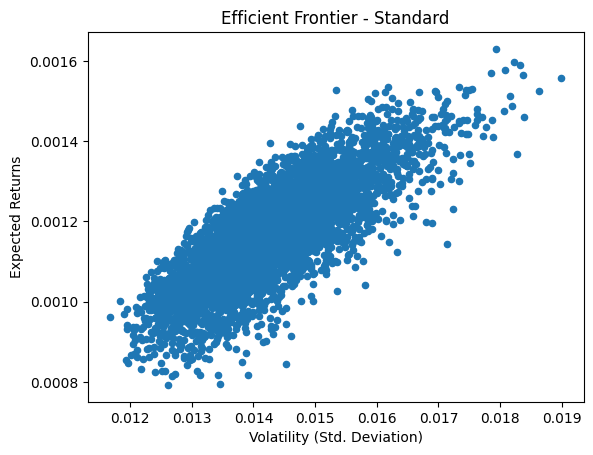

<Figure size 640x480 with 0 Axes>

In [155]:
chart_random_portfolios(random_portfolios, 'Standard')

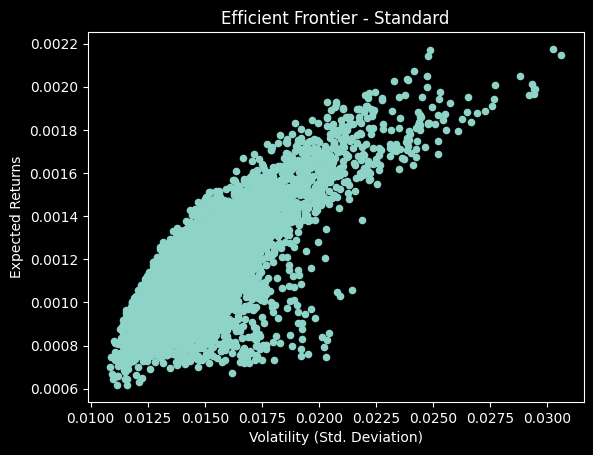

<Figure size 640x480 with 0 Axes>

In [205]:
chart_random_portfolios(random_portfolios_dirichlet, 'Dirichlet')

In [156]:
# Function that charts efficient frontier, random portfolios, and x for each stock in port
    
    
def efficient_frontier_with_stocks(random_portfolios_df, risks, returns, mean_returns_series, std_dev_series, save_as, dist_type='Standard'):
    # Scatter plot of the random portfolios
    random_portfolios_df.plot.scatter(x='Volatility', y='Returns', alpha=0.5)

    # Line plot of the efficient frontier
    plt.plot(risks, returns, 'y-o')

    # Plot each stock as a red 'x' and label them
    for ticker in mean_returns_series.index:
        x = std_dev_series[ticker]
        y = mean_returns_series[ticker]
        plt.scatter(x, y, marker='x', color='red', s=100)
        plt.text(x, y, ' {}'.format(ticker), color='red', fontsize=9)

    # Labels and Title
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Expected Returns')
    plt.title('Efficient Frontier with Individual Stocks - ' + dist_type)

    # Save the plot as an image file
    plt.savefig(save_as, bbox_inches='tight')

    # Show the plot
    plt.show()

    # Clears the current figure
    plt.clf()



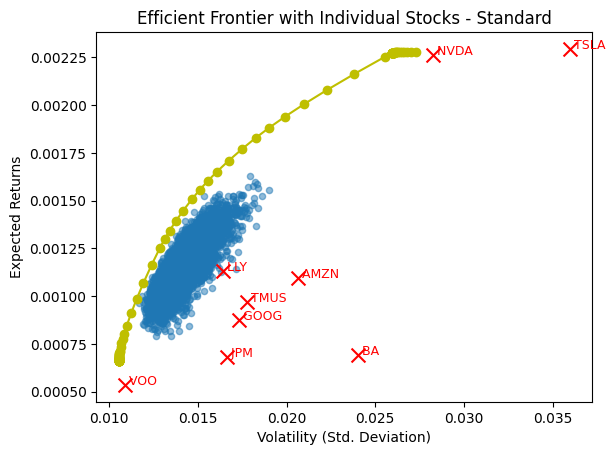

<Figure size 640x480 with 0 Axes>

In [157]:
# Using standard random portfolio function. Portfolios too bunched up.

efficient_frontier_with_stocks(random_portfolios, risks, returns, final_portfolio_mean_returns, final_portfolio_std,  '18 - efficient frontier, standard.png', 'Standard')

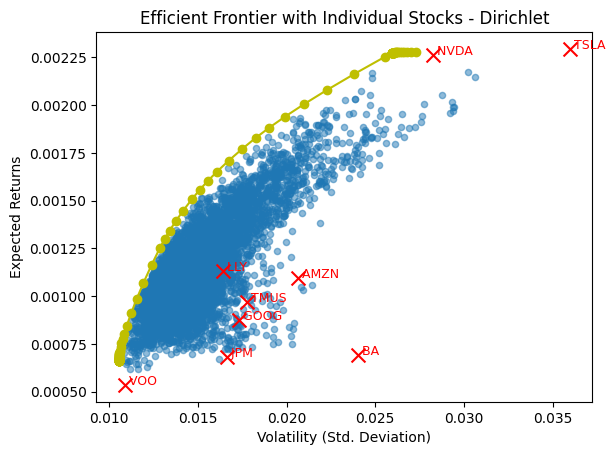

<Figure size 640x480 with 0 Axes>

In [219]:
# Using revised Dirichlete based function to get better spread of random portfolios.

efficient_frontier_with_stocks(random_portfolios_dirichlet, risks, returns, final_portfolio_mean_returns, final_portfolio_std, '19 - efficient fronter, dirichlet.png', 'Dirichlet')

In [220]:
# I want to give the client the portfolio weights for each risk level option
# Defined revised portfolio optimization function that also outputs 5 sample portfolio weights
# The 5 portfolios lie on various parts of the efficient frontier, from low risk to high risk (and return)


solvers.options['show_progress'] = False  # Optionally add this line to suppress output

import numpy as np
import pandas as pd
import cvxopt as opt

def optimal_portfolio_revised(returns_df):
    n = returns_df.shape[1]
    returns = np.transpose(returns_df.to_numpy())

    # Calculate mean returns and covariance matrix based on daily returns
    mean_returns = returns_df.mean()
    cov_matrix = returns_df.cov()

    # Define the range of expected returns for the efficient frontier
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices for the optimization
    S = opt.matrix(cov_matrix.values)
    pbar = opt.matrix(mean_returns.values)

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))  # negative n x n identity matrix
    h = opt.matrix(0.0, (n, 1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [opt.solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]

    # Calculate risks and returns for the frontier
    returns = [opt.blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(opt.blas.dot(x, S*x)) for x in portfolios]

    # Set up the list for the target returns we want to achieve
    target_returns = np.linspace(min(returns), max(returns), 5)
    
    # Initialize lists to store recommended portfolio returns and volatilities
    recommended_returns = []
    recommended_volatility = []
    recommended_weights = []
    
    for target_return in target_returns:
        # Define the constraint for the target return
        A = opt.matrix(np.vstack((np.ones((1, n)), np.array(mean_returns))))
        b = opt.matrix(np.array([1.0, target_return]))
        
        # Perform the optimization with an additional constraint that the portfolio's return must be close to the target_return
        weight = opt.solvers.qp(S, -pbar, G, h, A, b)['x']
        recommended_weights.append(weight)
        
        # Calculate the returns and volatility for the recommended portfolio
        portfolio_return = opt.blas.dot(pbar, weight)
        portfolio_volatility = np.sqrt(opt.blas.dot(weight, S*weight))
        
        recommended_returns.append(portfolio_return)
        recommended_volatility.append(portfolio_volatility)

    # Convert recommended weights to a NumPy array
    recommended_np = np.array([np.array(weight).flatten() for weight in recommended_weights])

    # Create DataFrame including 'Returns' and 'Volatility' columns
    data = np.column_stack((recommended_returns, recommended_volatility, recommended_np))
    columns = ['Returns', 'Volatility'] + list(returns_df.columns)
    recommended_df = pd.DataFrame(data, columns=columns)

    return portfolios, returns, risks, recommended_np, recommended_df





In [221]:
# Call the revised portfolio optimatization function

weights, returns, risks, recommended_np, recommended_df = optimal_portfolio_revised(final_portfolio_returns[1:])

In [222]:
# Check the new output from revised function

print(recommended_df)  # DataFrame
#print(weights)

# Save these porfolio weights to a csv file

recommended_df.to_csv('recommended portfolio weights, incl returns and volatility.csv', index=False)


    Returns  Volatility          AMZN            BA          GOOG  \
0  0.000662    0.010549  9.511149e-04  2.513095e-04  5.674537e-04   
1  0.001067    0.011918  5.347765e-02  4.406956e-04  1.218306e-02   
2  0.001471    0.014361  2.772006e-02  3.506260e-04  1.232558e-03   
3  0.001876    0.018930  5.493490e-06  1.105427e-06  1.827754e-06   
4  0.002280    0.027292  2.580089e-07  1.173027e-07  1.645009e-07   

            JPM           LLY      NVDA          TMUS      TSLA           VOO  
0  9.685073e-04  1.537758e-01  0.000127  7.643564e-02  0.000307  7.666166e-01  
1  7.101966e-02  3.466328e-01  0.064197  1.711500e-01  0.053707  2.271928e-01  
2  1.661088e-02  4.482007e-01  0.211374  1.761283e-01  0.118130  2.529978e-04  
3  1.809730e-06  3.490856e-01  0.433426  5.315679e-05  0.217425  8.166452e-07  
4  1.152796e-07  2.945553e-07  0.455031  1.993611e-07  0.544968  8.510119e-08  


In [223]:
print(final_portfolio_returns.head())


                AMZN        BA      GOOG       JPM       LLY      NVDA  \
Date                                                                     
2013-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-03  0.004547  0.005190  0.000581 -0.002016  0.004242  0.000786   
2013-01-04  0.002592  0.002840  0.019760  0.017725  0.037007  0.032993   
2013-01-07  0.035925 -0.020080 -0.004363  0.001103 -0.001357 -0.028897   
2013-01-08 -0.007748 -0.026271 -0.001974  0.001981  0.007574 -0.021927   

                TMUS      TSLA       VOO  
Date                                      
2013-01-02       NaN       NaN       NaN  
2013-01-03 -0.007217 -0.016685 -0.000898  
2013-01-04  0.010384 -0.010642  0.004195  
2013-01-07 -0.017472 -0.001744 -0.002686  
2013-01-08 -0.024059 -0.019220 -0.002992  


In [224]:
check_sum = recommended_df.iloc[1].sum()

In [225]:
# A slight flaw in the function produces > 1.0 weighting of the portfolios.  This can be fixed later.

print(check_sum)

1.0129846501771143


In [226]:
# Function to plot recommended portfolios on the efficent frontier chart

def ef_with_recommended_ports(random_portfolios_df, risks, returns, recommended_portfolios_df, save_as, dist_type='Standard'):
    # Scatter plot of the random portfolios
    random_portfolios_df.plot.scatter(x='Volatility', y='Returns', alpha=0.5)

    # Line plot of the efficient frontier
    plt.plot(risks, returns, 'y-o')

    # Plot each portfolio as a green 'x'
    for idx, row in recommended_portfolios_df.iterrows():
        plt.scatter(row['Volatility'], row['Returns'], marker='x', color='green', s=500)

    # Labels and Title
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Expected Returns')
    plt.title('Efficient Frontier with Recommended Portfolios - ' + dist_type)

    # Save the plot as an image file
    plt.savefig(save_as, bbox_inches='tight')

    # Show the plot
    plt.show()

    # Clears the current figure
    plt.clf()

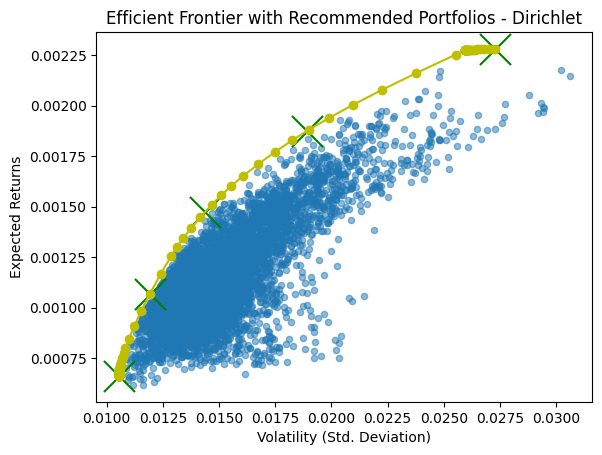

<Figure size 640x480 with 0 Axes>

In [227]:
ef_with_recommended_ports(random_portfolios_dirichlet, risks, returns, recommended_df, '20 - recommended ports on ef.png', 'Dirichlet')

In [228]:
# Function to plot recommended portfolios on the efficient frontier chart with enhancements
# Will not use but saving because it has an interesting design

def ef_with_recommended_ports_enhanced_white(random_portfolios_df, risks, returns, recommended_portfolios_df, save_as, dist_type='Standard'):
    # Scatter plot of the random portfolios
    random_portfolios_df.plot.scatter(x='Volatility', y='Returns', alpha=0.6, zorder = 5, label='Portfolios')

    # Line plot of the efficient frontier
    plt.plot(risks, returns, 'y-o', label='Efficient Frontier')

    # Plot each portfolio as a green 'x' with increased size for visibility
    for idx, row in recommended_portfolios_df.iterrows():
        plt.scatter(row['Volatility'], row['Returns'], marker='x', color='green', s=200, lw = 3, zorder = 6, label='Recommended Portfolio' if idx == 0 else "")

        # Add dotted red lines from each green 'x' to the axes
        plt.plot([row['Volatility'], row['Volatility']], [0, row['Returns']], 'r--', lw=0.5)  # Vertical line
        plt.plot([0, row['Volatility']], [row['Returns'], row['Returns']], 'r--', lw=0.5)  # Horizontal line

    # Labels and Title
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Expected Returns')
    plt.title('Efficient Frontier with Recommended Portfolios - ' + dist_type)

    # Define zones with shaded areas on the axes
    plt.axvspan(0, 0.01, color='blue', alpha=0.005, lw=0)
    plt.axvspan(0.01, 0.02, color='yellow', alpha=0.1, lw=0)
    plt.axvspan(0.02, max(random_portfolios_df['Volatility']), color='red', alpha=0.1, lw=0)

    plt.axhspan(0, 0.001, color='blue', alpha=0.1, lw=0, label='Low Risk/Low Return')
    plt.axhspan(0.001, 0.0015, color='yellow', alpha=0.1, lw=0, label='Moderate Risk/Moderate Return')
    plt.axhspan(0.0015, max(random_portfolios_df['Returns']), color='red', alpha=0.1, lw=0, label='High Risk/High Return')

    # Legend
    plt.legend()

    # Save the plot as an image file
    plt.savefig(save_as, bbox_inches='tight')

    # Show the plot
    plt.show()

    # Clears the current figure
    plt.clf()
    

# I set this to dark, which is effecting all other graphics now
def ef_with_recommended_ports_enhanced_dark(random_portfolios_df, risks, returns, recommended_portfolios_df, save_as, dist_type='Standard'):
    # Set the style of the plot
    plt.style.use('dark_background')  # Set the style to use a dark background
    
    # Scatter plot of the random portfolios
    random_portfolios_df.plot.scatter(x='Volatility', y='Returns', alpha=0.6, zorder = 5, label='Portfolios')

    # Line plot of the efficient frontier
    plt.plot(risks, returns, 'y-o', label='Efficient Frontier')

    # Plot each portfolio as a green 'x' with increased size for visibility
    for idx, row in recommended_portfolios_df.iterrows():
        plt.scatter(row['Volatility'], row['Returns'], marker='x', color='green', s=200, lw = 3, zorder = 6, label='Recommended Portfolio' if idx == 0 else "")

        # Add dotted red lines from each green 'x' to the axes
        plt.plot([row['Volatility'], row['Volatility']], [0, row['Returns']], 'r--', lw=0.5)  # Vertical line
        plt.plot([0, row['Volatility']], [row['Returns'], row['Returns']], 'r--', lw=0.5)  # Horizontal line

    # Labels and Title with white color for visibility
    plt.xlabel('Volatility (Std. Deviation)', color='white')
    plt.ylabel('Expected Returns', color='white')
    plt.title('Efficient Frontier with Recommended Portfolios - ' + dist_type, color='white')

    # Change color of tick labels
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')

    # Define zones with shaded areas on the axes
    plt.axvspan(0, 0.01, color='blue', alpha=0.005, lw=0)
    plt.axvspan(0.01, 0.02, color='yellow', alpha=0.1, lw=0)
    plt.axvspan(0.02, max(random_portfolios_df['Volatility']), color='red', alpha=0.1, lw=0)

    plt.axhspan(0, 0.001, color='blue', alpha=0.1, lw=0, label='Low Risk/Low Return')
    plt.axhspan(0.001, 0.0015, color='yellow', alpha=0.1, lw=0, label='Moderate Risk/Moderate Return')
    plt.axhspan(0.0015, max(random_portfolios_df['Returns']), color='red', alpha=0.1, lw=0, label='High Risk/High Return')

    # Legend with white color text for visibility
    legend = plt.legend()
    for text in legend.get_texts():
        text.set_color('white')

    # Save the plot as an image file
    plt.savefig(save_as, bbox_inches='tight', facecolor='#2D2D2D')  # Set the facecolor when saving

    # Show the plot
    plt.show()

    # Clears the current figure
    plt.clf()
    
    # Setting background to dark is global, so need to reset back to default
    # Reset to the default style
    plt.style.use('default')  # This will reset the style to the default




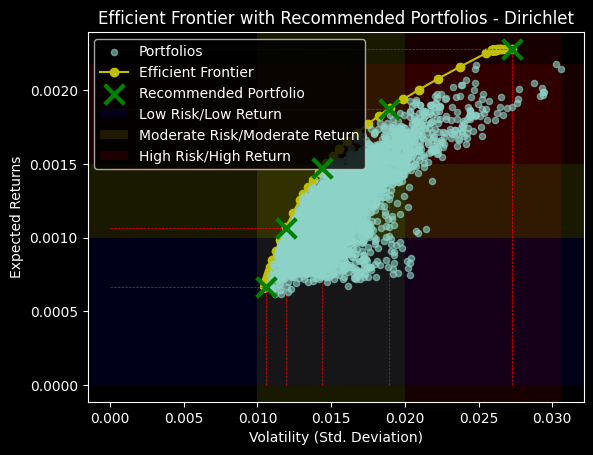

<Figure size 640x480 with 0 Axes>

In [229]:
ef_with_recommended_ports_enhanced_dark(random_portfolios_dirichlet, risks, returns, recommended_df, 'Dark 21 - recommended ports on ef _enhanced.png', 'Dirichlet')

In [230]:
# This plotting function brings it all together.
# Shows the efficient frontier, 5 sample portfolios, individual stocks, risk/return zones    

import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

def ef_with_recommended_ports_enhanced_2(random_portfolios_df, risks, returns, recommended_portfolios_df, mean_returns_series, std_dev_series, save_as, dist_type='Standard'):
    fig, ax = plt.subplots(figsize=(10, 7), dpi = 100)

    # Scatter plot of the random portfolios
    random_portfolios_df.plot.scatter(x='Volatility', y='Returns', alpha=0.5, ax=ax)

    # Line plot of the efficient frontier
    ax.plot(risks, returns, 'y-o')

    # Labels for the portfolio options
    portfolio_labels = ['A', 'B', 'C', 'D', 'E']  # Extend this list if you have more portfolio options

    # Offset values for text placement
    offset_up_left = (-0.001, 0.0001)  # x and y offsets for labels A, B, C, D
    offset_down_right = (0.001, -0.0001)  # x and y offsets for label E

    # Plot each portfolio as a green 'x' with red dotted lines to the axes, and add labels
    for idx, row in recommended_portfolios_df.iterrows():
        ax.scatter(row['Volatility'], row['Returns'], marker='x', color='green', s=300, lw=3, zorder=5)
        ax.plot([row['Volatility'], row['Volatility']], [0, row['Returns']], 'r:', lw=1, zorder=4)
        ax.plot([0, row['Volatility']], [row['Returns'], row['Returns']], 'r:', lw=1, zorder=4)
        # Get the corresponding label for the current index
        label = portfolio_labels[idx]
    
        # Determine label position based on whether it is the last label or not
        if idx == len(recommended_portfolios_df) - 1:  # Check if it is the last index
            # Place the last label slightly below and to the right of the marker
            ax.text(row['Volatility'] + offset_down_right[0], row['Returns'] + offset_down_right[1], label, 
                    fontsize='x-large', fontweight='bold', ha='left', va='bottom', zorder=6)
        else:
            # Place the label slightly above and to the left of the marker
            ax.text(row['Volatility'] + offset_up_left[0], row['Returns'] + offset_up_left[1], label, 
                    fontsize='x-large', fontweight='bold', ha='right', va='top', zorder=6)
    
    ###
    # Plot each stock as a red 'x' and label them
    for ticker in mean_returns_series.index:
        x = std_dev_series[ticker]
        y = mean_returns_series[ticker]
        plt.scatter(x, y, marker='x', color='red', s=100)
        plt.text(x, y, ' {}'.format(ticker), color='red', fontsize=9)
    ###
    
    # Adding color zones to the x-axis
    trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.fill_between([0, 0.010], 0, 0.05, color='lightblue', transform=trans, alpha=0.6)
    ax.fill_between([0.010, 0.020], 0, 0.05, color='lightyellow', transform=trans, alpha=0.6)
    ax.fill_between([0.020, max(risks)], 0, 0.05, color='lightcoral', transform=trans, alpha=0.6)

    # Adding color zones to the y-axis
    trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.fill_betweenx([0, 0.00075], 0, 0.05, color='lightblue', transform=trans, alpha=0.6)
    ax.fill_betweenx([0.00075, 0.0015], 0, 0.05, color='lightyellow', transform=trans, alpha=0.6)
    ax.fill_betweenx([0.0015, max(returns)], 0, 0.05, color='lightcoral', transform=trans, alpha=0.6)
    
    # Labels and Title
    ax.set_xlabel('Volatility (Std. Deviation)')
    ax.set_ylabel('Expected Returns')
    ax.set_title('Efficient Frontier with Recommended Portfolios - ' + dist_type)

    # Creating a custom legend for the colored zones
    # Updated legend with thicker lines
    blue_line = plt.Line2D([], [], color='lightblue', markersize=15, label='Low Risk / Low Return', alpha=0.5, linewidth=10)
    yellow_line = plt.Line2D([], [], color='lightyellow', markersize=15, label='Moderate Risk / Return', alpha=0.5, linewidth=10)
    red_line = plt.Line2D([], [], color='lightcoral', markersize=15, label='High Risk / High Return', alpha=0.5, linewidth=10)

    # Adding new legend items
    blue_dot = plt.Line2D([], [], color='#1f77b4', marker='o', linestyle='None', markersize=10, label='Random Portfolios')
    gold_line_dot = plt.Line2D([], [], color='y', marker='o', linestyle='-', markersize=10, label='Efficient Frontier')
    green_x = plt.Line2D([], [], color='green', marker='x', linestyle='None', markersize=10, markeredgewidth=2,label='Portfolio Options')

    # Update the legend with all handles
    plt.legend(handles=[blue_line, yellow_line, red_line, blue_dot, gold_line_dot, green_x], loc='upper left', bbox_to_anchor=(1,1))
    
    # TEMP - ADDED PER ADVICE OF AI
    plt.tight_layout()


    # Save the plot as an image file
    plt.savefig(save_as, bbox_inches='tight')

    # Show the plot
    plt.show()

    # Clears the current figure
    plt.clf()


# 7)  Your Portfolio Options

Here we bring together all of the information from our analysis.

We have settled on a portfolio that includes:

AMZN, BA, GOOG, JPM, LLY, NVDA, TMUS, TSLA, VOO

Historical price data suggests that this portfolio can be geared to higher risk/reward by giving more weight to TSLA and NVDA.  Risk can be easily dialed down by giving more weight to the very diversified VOO ETF. 

5 portfolio options along the Efficient Frontier from A to E are provided.  A is the least risky but has the lowest expected return. E involves the most risk but has a very high potential expected return.

We should note that this recommended portfolio is skewed towards higher risk and higher expected return.  The least risky option for this portfolio (Portfolio A) involves a moderate level of risk.  We believe this is appropriate for a young investor with a long time horizon that has some tolerance for volatility.  However, portfolios with a lower risk profile can be made by including bonds. (And example of this provided in the client presentation).

Weights for each portfolio option are provided in the client presentation.

Note:  Past performance is not a guarantee of future performance.  These recommended portfolios might behave substantially different than expected from past results.  The efficient frontier and recommended portfolios is based only on past stock price behavior.

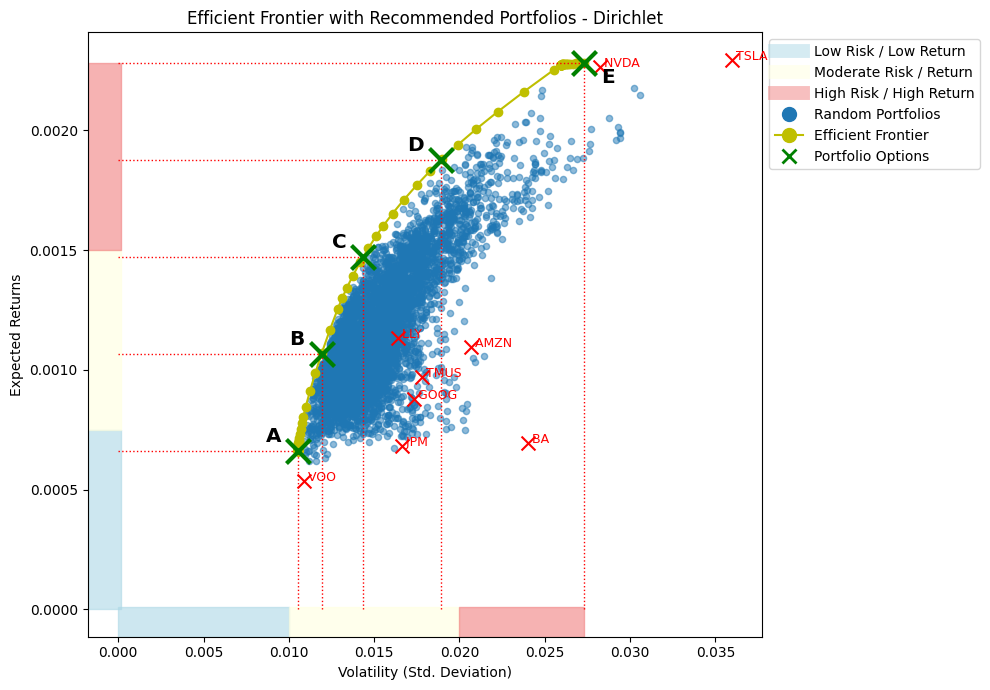

<Figure size 640x480 with 0 Axes>

In [231]:
# This graphic has all of the information
# Used Dirichlet method to generate random portfolios

ef_with_recommended_ports_enhanced_2(random_portfolios_dirichlet, risks, returns, recommended_df, final_portfolio_mean_returns, final_portfolio_std, '22 - recommended ports on ef _enhanced _2.png', 'Dirichlet')
# only for comparison - ERASE THIS AND LINE BELOW
#efficient_frontier_with_stocks(random_portfolios_dirichlet, risks, returns, final_portfolio_mean_returns, final_portfolio_std, '19 - efficient fronter, dirichlet.png', 'Dirichlet')